In [21]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Reloading the dataset after reset
file_path = 'C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_1/data/processed/cleaned_data.xlsx'
dataset = pd.read_excel(file_path)

# Checking the presence of death_date and adr_ctcae_grade columns in the dataset
death_date_column = 'death_date'
adr_ctcae_grade_column = 'adr_ctcae_grade'

# Checking the first few rows to verify presence of death_date and adr_ctcae_grade
dataset[['death_date', 'adr_ctcae_grade']].head()

,death_date,adr_ctcae_grade
0,NaN,1.500000
1,2022-07-18 00:00:00,1.285714
2,2023-06-05 00:00:00; 2023-07-25 00:00:00.000,2.333333
3,NaN,1.666667
4,NaN,1.285714


In [22]:
# Deriving the primary outcomes

# 1. Overall Survival (Deceased = 1, Alive = 0)
dataset['Overall_Survival'] = dataset['death_date'].apply(lambda x: 1 if pd.notna(x) else 0)

# 2. Severe ADRs (Grade ≥3)
dataset['Severe_ADRs'] = dataset['adr_ctcae_grade'].apply(lambda x: 1 if x > 2 else 0)

# Checking the derived columns for the first few rows
dataset[['death_date', 'adr_ctcae_grade', 'Overall_Survival', 'Severe_ADRs']].head()


,death_date,adr_ctcae_grade,Overall_Survival,Severe_ADRs
0,NaN,1.500000,0,0
1,2022-07-18 00:00:00,1.285714,1,0
2,2023-06-05 00:00:00; 2023-07-25 00:00:00.000,2.333333,1,1
3,NaN,1.666667,0,0
4,NaN,1.285714,0,0


In [23]:
# Checking the frequency distribution of the Overall Survival column
Overall_Survival = dataset['Overall_Survival'].value_counts()

# Display the distribution
Overall_Survival


Overall_Survival
0    306
1     97
Name: count, dtype: int64

In [24]:
# Checking the frequency distribution of the Severe_ADRs column
Severe_ADRs = dataset['Severe_ADRs'].value_counts()

# Display the distribution
Severe_ADRs

Severe_ADRs
0    370
1     33
Name: count, dtype: int64

In [25]:
dataset['readmission_flag'] = (dataset['Hospitalizations count'] > 1).astype(int)


In [26]:
# Checking the frequency distribution of the Readmission column
readmission_distribution = dataset['readmission_flag'].value_counts()

# Display the distribution
readmission_distribution


readmission_flag
0    327
1     76
Name: count, dtype: int64

In [27]:
dataset.head()

,patient_id,birth_date,age,age_group,gender,ethnicity,education_level,bmi_value,bmi_category,employment_status,...,adr_chemo_action,adr_source_project,adr_macro_category,adr_clean.1,albumin_range,hospital_admission_date,hospital_discharge_date,Overall_Survival,Severe_ADRs,readmission_flag
0,10_AO San Pio,1950-01-02,73,> 65 years,Male,Caucasian,Not Known / Missing,24.17,18.5-24.9 Normal Weight,Not Known / Missing,...,Modifica dello schema chemioterapico; Nessuna,ONCO,Tossicità Ematologica; Tossicità Gastrointesti...,Anemia; Diarrea; Nausea; Trombocitopenia; epis...,Low (<3.6 g/dL),NaN,NaN,0,0,0
1,10_AORN A. Cardarelli,1964-08-15,58,<= 65 years,Female,Caucasian,High School,19.53,18.5-24.9 Normal Weight,Not Known / Missing,...,NaN,Unknown,NaN,NaN,Normal (3.6-4.9 g/dL),2022-03-25,NaN,1,0,0
2,10_AORN Monaldi – Cotugno - C.T.O.,1939-04-03,84,> 65 years,Female,Caucasian,Middle School,19.53,18.5-24.9 Normal Weight,Retired,...,Nessuna; Trattamento chemioterapico interrotto,ONCO,Tossicità Dermatologica,Eritrodisestesia palmo-plantare (sindrome mani...,Normal (3.6-4.9 g/dL),NaN,NaN,1,1,0
3,10_AORN San Giuseppe Moscati,1947-12-09,76,> 65 years,Male,Caucasian,Not Known / Missing,20.20,18.5-24.9 Normal Weight,Not Known / Missing,...,"Il paziente non fa la terapia, è sottoposto a ...",ONCO,Neurotossicità; Tossicità Ematologica; altro,Anemia; Dolore muscolare-scheletrico; Tromboci...,Normal (3.6-4.9 g/dL),2024-07-02,2024-07-05,0,0,0
4,10_AORN Sant’Anna e San Sebastiano,1952-11-04,70,> 65 years,Female,Caucasian,Not Known / Missing,23.44,18.5-24.9 Normal Weight,Not Known / Missing,...,NaN,Unknown,NaN,NaN,Unknown,NaN,NaN,0,0,0


In [28]:
# Select only the outcome columns 
outcome_cols = [
    "patient_id",
    "Overall_Survival",
    "Severe_ADRs",
    "readmission_flag"
]

# Filter dataset
outcome_df = dataset[outcome_cols].copy()


# Save to output directory
output_path = r"C:\Users\HP\OneDrive\Desktop\VERO_code\Phase_2\results\tables\outcome.csv"
outcome_df.to_csv(output_path, index=False)

print(f"Outcome dataframe created and saved to:\n{output_path}")
print(f"Shape: {outcome_df.shape}")

Outcome dataframe created and saved to:
C:\Users\HP\OneDrive\Desktop\VERO_code\Phase_2\results\tables\outcome.csv
Shape: (403, 4)


In [29]:
# Get the list of all features and their datatypes
features_data_types = dataset.dtypes

# Convert the list into a DataFrame for easy viewing and exporting
features_data_types_df = features_data_types.reset_index()
features_data_types_df.columns = ['Feature', 'Data Type']

# Export to Excel
output_file = 'C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_2/results/tables/features_data_types.xlsx'
features_data_types_df.to_excel(output_file, index=False)

# Return the file path for downloading
output_file


'C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_2/results/tables/features_data_types.xlsx'

In [30]:
# Load the "features_data_types" file to extract the features and outcomes
features_data_types_df = pd.read_excel('C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_2/results/tables/features_data_types.xlsx')

# Define the outcome variables (from your specification)
outcomes = ['Overall_Survival', 'Severe_ADRs', 'readmission_flag']

# Filter the relevant features that will be used in the analysis
# The relevant features should exclude the outcomes and identifiers like patient_id
relevant_features = features_data_types_df[~features_data_types_df['Feature'].isin(outcomes + ['patient_id', 'birth_date'])]['Feature'].tolist()

# Display the relevant features and outcomes
print("Outcome Variables:", outcomes)
print("Relevant Features for Analysis:", relevant_features)


Outcome Variables: ['Overall_Survival', 'Severe_ADRs', 'readmission_flag']
Relevant Features for Analysis: ['age', 'age_group', 'gender', 'ethnicity', 'education_level', 'bmi_value', 'bmi_category', 'employment_status', 'alcohol_consumption', 'smoking_status_binary', 'smoking_status_detail', 'smoking_years', 'observation_start_date', 'observation_end_date', 'observation_end_reason', 'tumor_diagnosis_date', 'oncology_unit_start_date', 'tumor_type', 'tumor_stage_tnm', 'tumor_stage_roman', 'histological_grade', 'molecular_alterations', 'mutations_present', 'dpyd_genotype_known', 'dpyd_genotype_type', 'surgical_intervention', 'surgery_date', 'surgery_type', 'prior_surgery', 'previous number of treatment lines', 'other surgical intervention', 'surgery_complications', 'oncology_treatment_lines_n', 'radiotherapy_status', 'transfusion_received', 'transfusions_total_n', 'hypertension', 'aortic_insufficiency', 'dyslipidemia', 'bph', 'obesity_comorbidity', 'ischemic_heart_disease', 'atrial_fibril

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests


# Define outcome and feature lists
outcomes = ['Overall_Survival', 'Severe_ADRs', 'readmission_flag']
relevant_features = ['age', 'age_group', 'gender', 'ethnicity', 'education_level', 'bmi_value', 'bmi_category',
                     'employment_status', 'alcohol_consumption', 'smoking_status_binary', 'smoking_status_detail',
                     'smoking_years', 'observation_end_reason', 'tumor_type', 'tumor_stage_tnm', 'tumor_stage_roman',
                     'histological_grade', 'molecular_alterations', 'mutations_present', 'dpyd_genotype_known',
                     'dpyd_genotype_type', 'surgical_intervention', 'surgery_type', 'prior_surgery',
                     'previous number of treatment lines', 'other surgical intervention', 'surgery_complications',
                     'oncology_treatment_lines_n', 'radiotherapy_status', 'transfusion_received', 'transfusions_total_n',
                     'hypertension', 'aortic_insufficiency', 'dyslipidemia', 'bph', 'obesity_comorbidity',
                     'ischemic_heart_disease', 'atrial_fibrillation', 'copd', 'asthma', 'diabetes_type_ii', 
                     'gastroesophageal_reflux_full', 'hypertensive_heart_disease', 'renal_insufficiency', 
                     'depressive_syndrome', 'anemia_comorbidity', 'psychiatric_disorders', 'other_comorbidities',
                     'cardiovascular_disorders', 'gastrointestinal_disorders', 'cerebrovascular_disorders',
                     'ordinary_hospitalizations_n', 'death_during_observation','observation_days', 'blood_glucose_range', 
                     'white_blood_cells_range', 'red_blood_cells_range', 'hemoglobin_range', 'neutrophils_percent_range', 
                     'platelet_count_range', 'creatinine_range', 'ast_got_range', 'alt_gpt_range', 'total_bilirubin_range', 
                     'direct_bilirubin_range', 'end_reason_progression_any_line', 'chemio_fine_toxicity', 
                     'end_reason_other_any_line', 'Number of medication categories', 'treatment_line_n', 'chemo_schema_name', 
                     'chemo_cycles_n', 'dose_reduced', 'active_principles_n', 'Oncologic treatment line', 
                      'side effect', 'comobidity_cat', 'comorbidity_category_list', 'number of other pathologies', 
                     'adr_outcome', 'adr_chemo_correlation', 'adr_chemo_action']

# Function to determine if variable is binary
def is_binary(series):
    unique_vals = series.dropna().unique()
    return len(unique_vals) == 2 and set(unique_vals).issubset({0, 1, 'Yes', 'No', True, False})

# Container for results
results = []

for feature in relevant_features:
    if feature not in dataset.columns:
        continue
    for outcome in outcomes:
        if outcome not in dataset.columns:
            continue

        feature_data = dataset[feature].dropna()
        outcome_data = dataset[outcome].dropna()

        # Match observations
        df = dataset[[feature, outcome]].dropna()

        # Skip empty or invalid comparisons
        if df.empty:
            continue

        # Determine variable types
        feat_is_num = np.issubdtype(df[feature].dtype, np.number)
        out_is_num = np.issubdtype(df[outcome].dtype, np.number)

        try:
            # Chi-square: both categorical/binary
            if not feat_is_num and not out_is_num:
                crosstab = pd.crosstab(df[feature], df[outcome])
                chi2, p, dof, ex = stats.chi2_contingency(crosstab)
                test = "Chi-square"

            # t-test or ANOVA: numeric feature vs categorical outcome
            elif feat_is_num and not out_is_num:
                if is_binary(df[outcome]):
                    groups = [df[df[outcome] == val][feature] for val in df[outcome].unique()]
                    t_stat, p = stats.ttest_ind(*groups, nan_policy='omit')
                    test = "T-test"
                else:
                    model = ols(f"{feature} ~ C({outcome})", data=df).fit()
                    anova = stats.f_oneway(*(df[df[outcome] == val][feature] for val in df[outcome].unique()))
                    p = anova.pvalue
                    test = "ANOVA"

            # t-test or ANOVA: categorical feature vs numeric outcome
            elif not feat_is_num and out_is_num:
                if is_binary(df[feature]):
                    groups = [df[df[feature] == val][outcome] for val in df[feature].unique()]
                    t_stat, p = stats.ttest_ind(*groups, nan_policy='omit')
                    test = "T-test"
                else:
                    model = ols(f"{outcome} ~ C({feature})", data=df).fit()
                    anova = stats.f_oneway(*(df[df[feature] == val][outcome] for val in df[feature].unique()))
                    p = anova.pvalue
                    test = "ANOVA"

            # Correlation: both numeric
            else:
                r, p = stats.pearsonr(df[feature], df[outcome])
                test = "Pearson correlation"

            # Append result
            results.append({
                'Feature': feature,
                'Outcome': outcome,
                'Test Used': test,
                'P-Value': p
            })

        except Exception as e:
            results.append({
                'Feature': feature,
                'Outcome': outcome,
                'Test Used': 'Error',
                'P-Value': np.nan
            })

# Create DataFrame
results_df = pd.DataFrame(results)

# Adjust p-values for multiple testing using Benjamini-Hochberg FDR
_, corrected_pvals, _, _ = multipletests(results_df['P-Value'].dropna(), alpha=0.05, method='fdr_bh')
results_df.loc[results_df['P-Value'].notna(), 'Corrected P-Value'] = corrected_pvals

# Save results
results_df.to_excel("univariate_screening_results.xlsx", index=False)

print("Univariate screening complete. Results saved as 'univariate_screening_results.xlsx'")


Univariate screening complete. Results saved as 'univariate_screening_results.xlsx'


In [32]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
from math import sqrt



# Define outcome and feature lists
outcomes = ['Overall_Survival', 'Severe_ADRs', 'readmission_flag']
relevant_features = ['age', 'age_group', 'gender', 'ethnicity', 'education_level', 'bmi_value', 'bmi_category',
                     'employment_status', 'alcohol_consumption', 'smoking_status_binary', 'smoking_status_detail',
                     'smoking_years', 'observation_end_reason', 'tumor_type', 'tumor_stage_tnm', 'tumor_stage_roman',
                     'histological_grade', 'molecular_alterations', 'mutations_present', 'dpyd_genotype_known',
                     'dpyd_genotype_type', 'surgical_intervention', 'surgery_type', 'prior_surgery',
                     'previous number of treatment lines', 'other surgical intervention', 'surgery_complications',
                     'oncology_treatment_lines_n', 'radiotherapy_status', 'transfusion_received', 'transfusions_total_n',
                     'hypertension', 'aortic_insufficiency', 'dyslipidemia', 'bph', 'obesity_comorbidity',
                     'ischemic_heart_disease', 'atrial_fibrillation', 'copd', 'asthma', 'diabetes_type_ii', 
                     'gastroesophageal_reflux_full', 'hypertensive_heart_disease', 'renal_insufficiency', 
                     'depressive_syndrome', 'anemia_comorbidity', 'psychiatric_disorders', 'other_comorbidities',
                     'cardiovascular_disorders', 'gastrointestinal_disorders', 'cerebrovascular_disorders',
                     'ordinary_hospitalizations_n', 'death_during_observation','observation_days', 'blood_glucose_range', 
                     'white_blood_cells_range', 'red_blood_cells_range', 'hemoglobin_range', 'neutrophils_percent_range', 
                     'platelet_count_range', 'creatinine_range', 'ast_got_range', 'alt_gpt_range', 'total_bilirubin_range', 
                     'direct_bilirubin_range', 'end_reason_progression_any_line', 'chemio_fine_toxicity', 
                     'end_reason_other_any_line', 'Number of medication categories', 'treatment_line_n', 'chemo_schema_name', 
                     'chemo_cycles_n', 'dose_reduced', 'active_principles_n', 'Oncologic treatment line', 
                      'side effect', 'comobidity_cat', 'comorbidity_category_list', 'number of other pathologies', 
                     'adr_outcome', 'adr_chemo_correlation', 'adr_chemo_action']

# Utility function: determine if variable is binary
def is_binary(series):
    unique_vals = series.dropna().unique()
    return len(unique_vals) == 2 and set(unique_vals).issubset({0, 1, 'Yes', 'No', True, False})

# --- Effect size functions ---

# Cohen's d (for t-test)
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / dof)
    return (x.mean() - y.mean()) / pooled_std if pooled_std > 0 else np.nan

# Eta squared (for ANOVA)
def eta_squared(anova_table):
    return anova_table['sum_sq'][0] / anova_table['sum_sq'].sum()

# Cramér's V (for Chi-square)
def cramers_v(chi2, n, r, c):
    return sqrt(chi2 / (n * (min(r-1, c-1))))

# --- Main analysis loop ---
results = []

for feature in relevant_features:
    if feature not in dataset.columns:
        continue

    for outcome in outcomes:
        if outcome not in dataset.columns:
            continue

        df = dataset[[feature, outcome]].dropna()
        if df.empty:
            continue

        feat_is_num = np.issubdtype(df[feature].dtype, np.number)
        out_is_num = np.issubdtype(df[outcome].dtype, np.number)

        try:
            # --- Chi-square (both categorical) ---
            if not feat_is_num and not out_is_num:
                ctab = pd.crosstab(df[feature], df[outcome])
                chi2, p, dof, ex = stats.chi2_contingency(ctab)
                test = "Chi-square"
                n = ctab.sum().sum()
                effect_size = cramers_v(chi2, n, *ctab.shape)

            # --- Numeric feature vs categorical/binary outcome ---
            elif feat_is_num and not out_is_num:
                if is_binary(df[outcome]):
                    groups = [df[df[outcome] == val][feature] for val in df[outcome].unique()]
                    t_stat, p = stats.ttest_ind(*groups, nan_policy='omit')
                    test = "T-test"
                    effect_size = cohens_d(groups[0], groups[1])
                else:
                    model = ols(f"{feature} ~ C({outcome})", data=df).fit()
                    anova = stats.f_oneway(*(df[df[outcome] == val][feature] for val in df[outcome].unique()))
                    p = anova.pvalue
                    test = "ANOVA"
                    ss_between = sum([(df[df[outcome] == val][feature].mean() - df[feature].mean())**2 for val in df[outcome].unique()])
                    ss_total = sum((df[feature] - df[feature].mean())**2)
                    effect_size = ss_between / ss_total if ss_total > 0 else np.nan

            # --- Categorical feature vs numeric outcome ---
            elif not feat_is_num and out_is_num:
                if is_binary(df[feature]):
                    groups = [df[df[feature] == val][outcome] for val in df[feature].unique()]
                    t_stat, p = stats.ttest_ind(*groups, nan_policy='omit')
                    test = "T-test"
                    effect_size = cohens_d(groups[0], groups[1])
                else:
                    model = ols(f"{outcome} ~ C({feature})", data=df).fit()
                    anova = stats.f_oneway(*(df[df[feature] == val][outcome] for val in df[feature].unique()))
                    p = anova.pvalue
                    test = "ANOVA"
                    ss_between = sum([(df[df[feature] == val][outcome].mean() - df[outcome].mean())**2 for val in df[feature].unique()])
                    ss_total = sum((df[outcome] - df[outcome].mean())**2)
                    effect_size = ss_between / ss_total if ss_total > 0 else np.nan

            # --- Pearson correlation (both numeric) ---
            else:
                r, p = stats.pearsonr(df[feature], df[outcome])
                test = "Pearson correlation"
                effect_size = abs(r)

            results.append({
                'Feature': feature,
                'Outcome': outcome,
                'Test Used': test,
                'P-Value': p,
                'Effect Size': effect_size
            })

        except Exception as e:
            results.append({
                'Feature': feature,
                'Outcome': outcome,
                'Test Used': 'Error',
                'P-Value': np.nan,
                'Effect Size': np.nan
            })

# --- Compile results ---
results_df = pd.DataFrame(results)

# Apply FDR correction
_, corrected_pvals, _, _ = multipletests(results_df['P-Value'].dropna(), alpha=0.05, method='fdr_bh')
results_df.loc[results_df['P-Value'].notna(), 'Corrected P-Value'] = corrected_pvals

# Save to Excel
results_df.to_excel("univariate_screening_with_effect_size.xlsx", index=False)
print("✅ Univariate screening complete. Results saved as 'univariate_screening_with_effect_size.xlsx'")


✅ Univariate screening complete. Results saved as 'univariate_screening_with_effect_size.xlsx'


In [33]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats
from statsmodels.stats.multitest import multipletests
from pandas.api.types import (
    is_numeric_dtype, is_categorical_dtype, is_datetime64_any_dtype
)


def coerce_binary(series):
    mapping = {
        '0': 0, '1': 1, 0: 0, 1: 1,
        'no': 0, 'yes': 1, 'No': 0, 'Yes': 1,
        False: 0, True: 1,
        'false': 0, 'true': 1, 'False': 0, 'True': 1,
        'N': 0, 'Y': 1, 'n': 0, 'y': 1
    }
    return series.map(lambda x: mapping[x] if x in mapping else x).astype("float").round().astype("Int64").astype(int)

if "Overall_Survival" not in dataset.columns and "death_date" in dataset.columns:
    dataset["Overall_Survival"] = dataset["death_date"].notna().astype(int)
if "Severe_ADRs" not in dataset.columns and "adr_ctcae_grade" in dataset.columns:
    dataset["Severe_ADRs"] = (dataset["adr_ctcae_grade"] >= 3).astype(int)
if "readmission_flag" not in dataset.columns:
    # leave as NaN if not derived upstream
    dataset["readmission_flag"] = np.nan

for col in ["Overall_Survival", "Severe_ADRs", "readmission_flag"]:
    if col in dataset.columns:
        dataset[col] = coerce_binary(dataset[col])
        dataset[col] = dataset[col].astype("category")

# Frailty: use categorical version only
outcomes = ["Overall_Survival", "Severe_ADRs", "readmission_flag"]
outcomes = [c for c in outcomes if c in dataset.columns]

# ------------------------------------------------------------
# FEATURES (your confirmed list, filter to those present)
# ------------------------------------------------------------
relevant_features = ['age', 'age_group', 'gender', 'ethnicity', 'education_level', 'bmi_value', 'bmi_category',
                     'employment_status', 'alcohol_consumption', 'smoking_status_binary', 'smoking_status_detail',
                     'smoking_years', 'observation_end_reason', 'tumor_type', 'tumor_stage_tnm', 'tumor_stage_roman',
                     'histological_grade', 'molecular_alterations', 'mutations_present', 'dpyd_genotype_known',
                     'dpyd_genotype_type', 'surgical_intervention', 'surgery_type', 'prior_surgery',
                     'previous number of treatment lines', 'other surgical intervention', 'surgery_complications',
                     'oncology_treatment_lines_n', 'radiotherapy_status', 'transfusion_received', 'transfusions_total_n',
                     'hypertension', 'aortic_insufficiency', 'dyslipidemia', 'bph', 'obesity_comorbidity',
                     'ischemic_heart_disease', 'atrial_fibrillation', 'copd', 'asthma', 'diabetes_type_ii', 
                     'gastroesophageal_reflux_full', 'hypertensive_heart_disease', 'renal_insufficiency', 
                     'depressive_syndrome', 'anemia_comorbidity', 'psychiatric_disorders', 'other_comorbidities',
                     'cardiovascular_disorders', 'gastrointestinal_disorders', 'cerebrovascular_disorders',
                     'ordinary_hospitalizations_n', 'death_during_observation','observation_days', 'blood_glucose_range', 
                     'white_blood_cells_range', 'red_blood_cells_range', 'hemoglobin_range', 'neutrophils_percent_range', 
                     'platelet_count_range', 'creatinine_range', 'ast_got_range', 'alt_gpt_range', 'total_bilirubin_range', 
                     'direct_bilirubin_range', 'end_reason_progression_any_line', 'chemio_fine_toxicity', 
                     'end_reason_other_any_line', 'Number of medication categories', 'treatment_line_n', 'chemo_schema_name', 
                     'chemo_cycles_n', 'dose_reduced', 'active_principles_n', 'Oncologic treatment line', 
                      'side effect', 'comobidity_cat', 'comorbidity_category_list', 'number of other pathologies', 
                     'adr_outcome', 'adr_chemo_correlation', 'adr_chemo_action']

relevant_features = [f for f in relevant_features if f in dataset.columns]

# ------------------------------------------------------------
# EFFECT SIZE HELPERS
# ------------------------------------------------------------
def is_binary_series(s):
    vals = s.dropna().unique()
    return len(vals) == 2

def cohens_d(x, y):
    x = pd.to_numeric(x, errors='coerce').dropna()
    y = pd.to_numeric(y, errors='coerce').dropna()
    nx, ny = len(x), len(y)
    if nx < 2 or ny < 2:
        return np.nan
    dof = nx + ny - 2
    pooled = sqrt(((nx - 1) * x.var(ddof=1) + (ny - 1) * y.var(ddof=1)) / dof) if dof > 0 else np.nan
    return (x.mean() - y.mean()) / pooled if (pooled is not None and pooled > 0) else np.nan

def cramers_v(chi2, n, r, c):
    if n == 0:
        return np.nan
    denom = n * (min(r - 1, c - 1))
    if denom <= 0:
        return np.nan
    return sqrt(chi2 / denom)

def effect_label(value, test):
    if pd.isna(value):
        return ""
    if test == "T-test":  # Cohen d
        return ("negligible" if abs(value) < 0.2 else
                "small" if abs(value) < 0.5 else
                "medium" if abs(value) < 0.8 else
                "large")
    if test == "ANOVA":   # eta^2
        return ("negligible" if value < 0.01 else
                "small" if value < 0.06 else
                "medium" if value < 0.14 else
                "large")
    if test == "Chi-square":  # Cramér V
        return ("negligible" if value < 0.1 else
                "small" if value < 0.3 else
                "medium" if value < 0.5 else
                "large")
    if test == "Pearson correlation":  # r
        return ("negligible" if abs(value) < 0.1 else
                "small" if abs(value) < 0.3 else
                "medium" if abs(value) < 0.5 else
                "large")
    return ""

# ------------------------------------------------------------
# UNIVARIATE SCREENING
# ------------------------------------------------------------
rows = []

for feature in relevant_features:
    # skip datetime features (convert upstream if needed)
    if is_datetime64_any_dtype(dataset[feature]):
        continue

    for outcome in outcomes:
        df = dataset[[feature, outcome]].dropna()
        if df.empty:
            continue

        feat_num = is_numeric_dtype(df[feature])
        out_num  = is_numeric_dtype(df[outcome])  # outcomes are categorical; this will be False

        try:
            # Categorical vs categorical -> Chi-square
            if not feat_num and not out_num:
                ctab = pd.crosstab(df[feature], df[outcome])
                # must have at least 2x2
                if ctab.shape[0] < 2 or ctab.shape[1] < 2:
                    continue
                chi2, p, dof, ex = stats.chi2_contingency(ctab)
                test = "Chi-square"
                n = int(ctab.values.sum())
                eff = cramers_v(chi2, n, *ctab.shape)

            # Numeric feature vs categorical outcome -> T-test (binary) or ANOVA (multi-class)
            elif feat_num and not out_num:
                groups = [pd.to_numeric(df.loc[df[outcome] == g, feature], errors='coerce').dropna()
                          for g in df[outcome].unique()]
                groups = [g for g in groups if len(g) > 0]
                if len(groups) < 2:
                    continue
                if is_binary_series(df[outcome]):
                    t_stat, p = stats.ttest_ind(groups[0], groups[1], nan_policy='omit', equal_var=False)
                    test = "T-test"
                    eff = cohens_d(groups[0], groups[1])
                else:
                    p = stats.f_oneway(*groups).pvalue
                    test = "ANOVA"
                    all_vals = pd.concat(groups, axis=0)
                    grand_mean = all_vals.mean()
                    ss_between = sum([len(g) * (g.mean() - grand_mean) ** 2 for g in groups])
                    ss_total = ((all_vals - grand_mean) ** 2).sum()
                    eff = (ss_between / ss_total) if ss_total > 0 else np.nan

            # Categorical feature vs numeric outcome (not expected here, since outcomes are categorical) 
            # included for completeness; will rarely trigger given your outcomes
            elif not feat_num and out_num:
                groups = [pd.to_numeric(df.loc[df[feature] == g, outcome], errors='coerce').dropna()
                          for g in df[feature].unique()]
                groups = [g for g in groups if len(g) > 0]
                if len(groups) < 2:
                    continue
                if is_binary_series(df[feature]):
                    t_stat, p = stats.ttest_ind(groups[0], groups[1], nan_policy='omit', equal_var=False)
                    test = "T-test"
                    eff = cohens_d(groups[0], groups[1])
                else:
                    p = stats.f_oneway(*groups).pvalue
                    test = "ANOVA"
                    all_vals = pd.concat(groups, axis=0)
                    grand_mean = all_vals.mean()
                    ss_between = sum([len(g) * (g.mean() - grand_mean) ** 2 for g in groups])
                    ss_total = ((all_vals - grand_mean) ** 2).sum()
                    eff = (ss_between / ss_total) if ss_total > 0 else np.nan

            # Numeric vs numeric -> Pearson (won't run for your outcomes, left for generality)
            else:
                x = pd.to_numeric(df[feature], errors='coerce').dropna()
                y = pd.to_numeric(df[outcome], errors='coerce').dropna()
                xy = pd.concat([x, y], axis=1).dropna()
                if len(xy) < 3:
                    continue
                r, p = stats.pearsonr(xy.iloc[:, 0], xy.iloc[:, 1])
                test = "Pearson correlation"
                eff = abs(r)

            rows.append({
                "Feature": feature,
                "Outcome": outcome,
                "Test Used": test,
                "P-Value": p,
                "Effect Size": eff,
                "Effect Size (qualitative)": effect_label(eff, test)
            })

        except Exception:
            rows.append({
                "Feature": feature,
                "Outcome": outcome,
                "Test Used": "Error",
                "P-Value": np.nan,
                "Effect Size": np.nan,
                "Effect Size (qualitative)": ""
            })

results_df = pd.DataFrame(rows)

# FDR correction
mask = results_df["P-Value"].notna()
if mask.any():
    _, qvals, _, _ = multipletests(results_df.loc[mask, "P-Value"], alpha=0.05, method="fdr_bh")
    results_df.loc[mask, "Corrected P-Value"] = qvals

# Sort and save
results_df = results_df.sort_values(by=["Outcome", "Corrected P-Value", "P-Value"], na_position="last")
results_df.to_excel("univariate_screening_results_with_effects.xlsx", index=False)
results_df.head(20)


,Feature,Outcome,Test Used,P-Value,Effect Size,Effect Size (qualitative),Corrected P-Value
156,death_during_observation,Overall_Survival,Chi-square,1.972942e-19,0.449057,medium,2.426718e-17
165,white_blood_cells_range,Overall_Survival,Chi-square,9.556896e-11,0.357205,medium,5.877491e-09
219,active_principles_n,Overall_Survival,T-test,3.014711e-10,-0.695662,medium,1.361400e-08
36,observation_end_reason,Overall_Survival,Chi-square,3.320489e-10,0.362741,medium,1.361400e-08
78,surgery_complications,Overall_Survival,Chi-square,3.401997e-09,0.311077,medium,1.195559e-07
174,neutrophils_percent_range,Overall_Survival,Chi-square,1.097231e-08,0.314812,medium,3.373986e-07
57,dpyd_genotype_known,Overall_Survival,Chi-square,1.044882e-07,0.266270,small,2.856010e-06
60,dpyd_genotype_type,Overall_Survival,Chi-square,1.231807e-07,0.280991,small,3.030244e-06
24,alcohol_consumption,Overall_Survival,Chi-square,7.103375e-07,0.279002,small,1.588573e-05
30,smoking_status_detail,Overall_Survival,Chi-square,1.008915e-06,0.275764,small,2.068276e-05


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configure
TOP_N = 15
outcomes_list = results_df['Outcome'].dropna().unique()

for outc in outcomes_list:
    sub = results_df[results_df['Outcome'] == outc].copy()
    sub = sub[sub['Corrected P-Value'].notna()].sort_values('Corrected P-Value').head(TOP_N)
    if sub.empty:
        continue

    fig = plt.figure(figsize=(8, 6))
    y = sub['Feature']
    x = -np.log10(sub['Corrected P-Value'].astype(float).clip(lower=1e-300))
    plt.barh(y, x)
    plt.gca().invert_yaxis()
    plt.xlabel('-log10(FDR q-value)')
    plt.title(f'Top {TOP_N} features for {outc}')
    for i, v in enumerate(x):
        plt.text(v, i, f"  {sub.iloc[i]['Test Used']} | {sub.iloc[i]['Effect Size (qualitative)']}", va='center')
    plt.tight_layout()
    plt.savefig(f'univariate_top{TOP_N}_{outc}.png', dpi=200)
    plt.close()


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TOP_LABELS = 25
outcomes_list = results_df['Outcome'].dropna().unique()

for outc in outcomes_list:
    sub = results_df[results_df['Outcome'] == outc].copy()
    sub = sub[sub['Corrected P-Value'].notna()]
    if sub.empty:
        continue

    sub['neglog10_q'] = -np.log10(sub['Corrected P-Value'].astype(float).clip(lower=1e-300))
    sub['abs_effect'] = sub['Effect Size'].abs()

    fig = plt.figure(figsize=(7, 6))
    plt.scatter(sub['abs_effect'], sub['neglog10_q'], alpha=0.7)
    plt.xlabel('Absolute effect size')
    plt.ylabel('-log10(FDR q-value)')
    plt.title(f'Effect size vs significance: {outc}')

    # label top points by significance
    top = sub.sort_values('Corrected P-Value').head(TOP_LABELS)
    for _, row in top.iterrows():
        plt.text(row['abs_effect'], row['neglog10_q'], f" {row['Feature']}", fontsize=8)

    plt.tight_layout()
    plt.savefig(f'univariate_volcano_{outc}.png', dpi=200)
    plt.close()


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build a Feature x Outcome matrix of absolute effect sizes
mat = results_df.copy()
mat = mat[mat['Effect Size'].notna()]
if mat.empty:
    print("No effect sizes available for heatmap.")
else:
    mat['abs_effect'] = mat['Effect Size'].abs()
    heat = mat.pivot_table(index='Feature', columns='Outcome', values='abs_effect', aggfunc='max')

    # Keep only reasonably informative rows (optional trims)
    keep_rows = heat.max(axis=1).sort_values(ascending=False).head(40).index  # top 40 features by any effect
    heat = heat.loc[keep_rows]

    fig = plt.figure(figsize=(10, max(6, 0.25*len(heat))))
    # Simple matplotlib heatmap
    data = heat.fillna(0).values
    im = plt.imshow(data, aspect='auto')
    plt.colorbar(im, fraction=0.046, pad=0.04, label='|Effect size|')

    plt.xticks(ticks=range(len(heat.columns)), labels=heat.columns, rotation=45, ha='right')
    plt.yticks(ticks=range(len(heat.index)), labels=heat.index)
    plt.title('Effect size matrix (absolute)')
    plt.tight_layout()
    plt.savefig('univariate_effectsize_heatmap.png', dpi=200)
    plt.close()


In [37]:
summary_frames = []
for outc in results_df['Outcome'].dropna().unique():
    sub = results_df[results_df['Outcome'] == outc].copy()
    sub = sub[sub['Corrected P-Value'].notna()]
    if sub.empty:
        continue
    sub = sub.sort_values(['Corrected P-Value', 'P-Value']).head(25)
    sub.insert(0, 'Outcome_name', outc)
    summary_frames.append(sub[['Outcome_name','Feature','Test Used','P-Value','Corrected P-Value','Effect Size','Effect Size (qualitative)']])

if summary_frames:
    summary = pd.concat(summary_frames, axis=0)
    summary.to_excel('univariate_summary_top25.xlsx', index=False)


In [38]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# Collect all generated plot files (from previous visualization scripts)
plot_files = sorted([f for f in os.listdir() if f.startswith("univariate_") and f.endswith(".png")])

# Create a consolidated PDF
pdf_path = "Univariate_Screening_Visuals.pdf"
with PdfPages(pdf_path) as pdf:
    for img_path in plot_files:
        fig = plt.figure(figsize=(8, 6))
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.splitext(img_path)[0], fontsize=10)
        pdf.savefig(fig, bbox_inches="tight")
        plt.close(fig)

print(f"✅ Consolidated PDF created: {pdf_path}")

✅ Consolidated PDF created: Univariate_Screening_Visuals.pdf


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    brier_score_loss, confusion_matrix, classification_report, RocCurveDisplay,
    PrecisionRecallDisplay
)
from sklearn.calibration import calibration_curve
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype

# -------------------------
# 0) Config
# -------------------------
OUTPUT_DIR = Path("binary_models_outputs")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


# Define binary outcomes
binary_outcomes = [col for col in ["Severe_ADRs","readmission_flag"] if col in dataset.columns]
if not binary_outcomes:
    raise ValueError("No binary outcomes found among ['Severe_ADRs','readmission_flag'].")

# Define the list of candidate features
candidate_features_all = ['age', 'age_group', 'gender', 'ethnicity', 'education_level', 'bmi_value', 'bmi_category',
                     'employment_status', 'alcohol_consumption', 'smoking_status_binary', 'smoking_status_detail',
                     'smoking_years', 'observation_end_reason', 'tumor_type', 'tumor_stage_tnm', 'tumor_stage_roman',
                     'histological_grade', 'molecular_alterations', 'mutations_present', 'dpyd_genotype_known',
                     'dpyd_genotype_type', 'surgical_intervention', 'surgery_type', 'prior_surgery',
                     'previous number of treatment lines', 'other surgical intervention', 'surgery_complications',
                     'oncology_treatment_lines_n', 'radiotherapy_status', 'transfusion_received', 'transfusions_total_n',
                     'hypertension', 'aortic_insufficiency', 'dyslipidemia', 'bph', 'obesity_comorbidity',
                     'ischemic_heart_disease', 'atrial_fibrillation', 'copd', 'asthma', 'diabetes_type_ii', 
                     'gastroesophageal_reflux_full', 'hypertensive_heart_disease', 'renal_insufficiency', 
                     'depressive_syndrome', 'anemia_comorbidity', 'psychiatric_disorders', 'other_comorbidities',
                     'cardiovascular_disorders', 'gastrointestinal_disorders', 'cerebrovascular_disorders',
                     'ordinary_hospitalizations_n', 'death_during_observation','observation_days', 'blood_glucose_range', 
                     'white_blood_cells_range', 'red_blood_cells_range', 'hemoglobin_range', 'neutrophils_percent_range', 
                     'platelet_count_range', 'creatinine_range', 'ast_got_range', 'alt_gpt_range', 'total_bilirubin_range', 
                     'direct_bilirubin_range', 'end_reason_progression_any_line', 'chemio_fine_toxicity', 
                     'end_reason_other_any_line', 'Number of medication categories', 'treatment_line_n', 'chemo_schema_name', 
                     'chemo_cycles_n', 'dose_reduced', 'active_principles_n', 'Oncologic treatment line', 
                      'side effect', 'comobidity_cat', 'comorbidity_category_list', 'number of other pathologies', 
                     'adr_outcome', 'adr_chemo_correlation', 'adr_chemo_action']

# Filter candidate features to those present in the dataset
candidate_features_all = [f for f in candidate_features_all if f in dataset.columns]

# Enforce binary encoding of outcomes as 0/1 integers (safeguard)
def _to_binary_int(s: pd.Series) -> pd.Series:
    mapping = {
        '0': 0, '1': 1, 0: 0, 1: 1,
        'no': 0, 'yes': 1, 'No': 0, 'Yes': 1,
        False: 0, True: 1,
        'false': 0, 'true': 1, 'False': 0, 'True': 1,
        'N': 0, 'Y': 1, 'n': 0, 'y': 1
    }
    out = s.map(lambda x: mapping[x] if x in mapping else x)
    out = pd.to_numeric(out, errors='coerce')
    return out.astype('Int64').astype('float').round().astype('Int64').fillna(0).astype(int)

# Apply binary conversion to the outcomes
for col in binary_outcomes:
    dataset[col] = _to_binary_int(dataset[col])

# -------------------------
# 1) Choose features to model
# -------------------------
try:
    # Check if FDR significant features are available
    sig_feats = (results_df
                 .query("`Corrected P-Value` < 0.05 and Outcome in @binary_outcomes")
                 ['Feature'].unique().tolist())
    features_to_use = [f for f in sig_feats if f in dataset.columns]
    if len(features_to_use) == 0:
        features_to_use = candidate_features_all.copy()
except Exception:
    features_to_use = candidate_features_all.copy()

# Filter out datetime features
def _not_datetime(col):
    return not is_datetime64_any_dtype(dataset[col])

features_to_use = [c for c in features_to_use if _not_datetime(c)]

# -------------------------
# 2) Build preprocessing pipeline
# -------------------------
# Split features into numeric vs categorical
num_feats = [c for c in features_to_use if is_numeric_dtype(dataset[c])]
cat_feats = [c for c in features_to_use if (not is_numeric_dtype(dataset[c]))]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Fix the error by removing the `sparse=False` argument (or use `sparse_output=True` for sparse matrices)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # Updated line
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_feats),
        ("cat", categorical_transformer, cat_feats)
    ],
    remainder="drop"
)

# -------------------------
# 3) Train Elastic Net Logistic Regression with CV
# -------------------------
def fit_evaluate_elasticnet(outcome: str):
    y = dataset[outcome].astype(int)
    X = dataset[features_to_use].copy()

    # train-test split
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Pipeline with preprocessor + model
    logit_cv = LogisticRegressionCV(
        Cs=10,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        penalty="elasticnet",
        solver="saga",
        l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9],
        scoring="roc_auc",
        class_weight="balanced",
        max_iter=10000,
        n_jobs=-1,
        refit=True
    )

    pipe = Pipeline(steps=[("prep", preprocessor),
                          ("clf", logit_cv)])

    pipe.fit(X_tr, y_tr)

    # Predict proba on test
    y_prob = pipe.predict_proba(X_te)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    # Metrics
    auc = roc_auc_score(y_te, y_prob)
    ap = average_precision_score(y_te, y_prob)
    brier = brier_score_loss(y_te, y_prob)
    cm = confusion_matrix(y_te, y_pred)

    print(f"\n=== Outcome: {outcome} ===")
    print(f"AUC: {auc:.3f}  |  AUPRC: {ap:.3f}  |  Brier: {brier:.3f}")
    print("Confusion matrix [tn, fp; fn, tp]:")
    print(cm)
    print("\nClassification report:")
    print(classification_report(y_te, y_pred, digits=3))

    # -------------------------
    # Plots (ROC, PR, Calibration)
    # -------------------------
    fpr, tpr, _ = roc_curve(y_te, y_prob)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.title(f"ROC - {outcome}")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"roc_{outcome}.png", dpi=200)
    plt.close()

    PrecisionRecallDisplay.from_predictions(y_te, y_prob)
    plt.title(f"PR Curve - {outcome}")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"pr_{outcome}.png", dpi=200)
    plt.close()

    prob_true, prob_pred = calibration_curve(y_te, y_prob, n_bins=10)
    plt.figure()
    plt.plot(prob_pred, prob_true, marker='o')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("Predicted probability")
    plt.ylabel("Observed fraction")
    plt.title(f"Calibration - {outcome}")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"calibration_{outcome}.png", dpi=200)
    plt.close()

    # -------------------------
    # Extract coefficients (map back to feature names), ORs and CIs
    # -------------------------
    # Get trained LR from pipeline
    lr = pipe.named_steps["clf"]

    # Recover feature names after preprocessing
    # numeric names unchanged; categorical expanded via OneHot
    ohe = pipe.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
    cat_out_names = []
    if len(cat_feats) > 0:
        cat_out_names = ohe.get_feature_names_out(cat_feats).tolist()
    final_feature_names = num_feats + cat_out_names

    # model coefficients correspond to final_feature_names
    coefs = lr.coef_.ravel()  # (n_features,)
    intercept = lr.intercept_[0]

    # Odds ratios and Wald-type CI approximation using 1/SE from Hessian is not exposed by LR-CV.
    # We'll report OR from coefficients only. For CI, a quick bootstrap is an option later.
    coef_df = pd.DataFrame({
        "Feature_Expanded": final_feature_names,
        "Coefficient": coefs,
        "Odds_Ratio": np.exp(coefs)
    }).sort_values("Odds_Ratio", ascending=False)

    # Save tables
    coef_df.to_excel(OUTPUT_DIR / f"coefficients_{outcome}.xlsx", index=False)

    # Also store metrics
    metrics_row = pd.DataFrame([{
        "Outcome": outcome,
        "AUC": auc,
        "AUPRC": ap,
        "Brier": brier,
        "TN": cm[0,0], "FP": cm[0,1], "FN": cm[1,0], "TP": cm[1,1],
        "Intercept": intercept
    }])
    return pipe, coef_df, metrics_row

# -------------------------
# 4) Run for each binary outcome and aggregate metrics
# -------------------------
all_metrics = []
models = {}

for outc in binary_outcomes:
    model, coefs, met = fit_evaluate_elasticnet(outc)
    models[outc] = {"pipeline": model, "coefs": coefs}
    all_metrics.append(met)

metrics_df = pd.concat(all_metrics, ignore_index=True)
metrics_df.to_excel(OUTPUT_DIR / "binary_model_metrics.xlsx", index=False)

print(f"\nSaved outputs to: {OUTPUT_DIR.resolve()}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



=== Outcome: Severe_ADRs ===
AUC: 0.742  |  AUPRC: 0.200  |  Brier: 0.174
Confusion matrix [tn, fp; fn, tp]:
[[81 30]
 [ 4  6]]

Classification report:
              precision    recall  f1-score   support

           0      0.953     0.730     0.827       111
           1      0.167     0.600     0.261        10

    accuracy                          0.719       121
   macro avg      0.560     0.665     0.544       121
weighted avg      0.888     0.719     0.780       121



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



=== Outcome: readmission_flag ===
AUC: 0.922  |  AUPRC: 0.823  |  Brier: 0.099
Confusion matrix [tn, fp; fn, tp]:
[[89  9]
 [ 6 17]]

Classification report:
              precision    recall  f1-score   support

           0      0.937     0.908     0.922        98
           1      0.654     0.739     0.694        23

    accuracy                          0.876       121
   macro avg      0.795     0.824     0.808       121
weighted avg      0.883     0.876     0.879       121


Saved outputs to: C:\Users\HP\OneDrive\Desktop\VERO_code\Phase_2\notebook\binary_models_outputs


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    brier_score_loss, confusion_matrix, classification_report, RocCurveDisplay,
    PrecisionRecallDisplay
)
from sklearn.calibration import calibration_curve
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype

# -------------------------
# 0) Config
# -------------------------
OUTPUT_DIR = Path("binary_models_outputs")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


# Define binary outcomes
binary_outcomes = [col for col in ["Severe_ADRs","readmission_flag"] if col in dataset.columns]
if not binary_outcomes:
    raise ValueError("No binary outcomes found among ['Severe_ADRs','readmission_flag', 'frailty_category'].")

# Define the list of candidate features
candidate_features_all = ['age', 'age_group', 'gender', 'ethnicity', 'education_level', 'bmi_value', 'bmi_category',
                     'employment_status', 'alcohol_consumption', 'smoking_status_binary', 'smoking_status_detail',
                     'smoking_years', 'observation_end_reason', 'tumor_type', 'tumor_stage_tnm', 'tumor_stage_roman',
                     'histological_grade', 'molecular_alterations', 'mutations_present', 'dpyd_genotype_known',
                     'dpyd_genotype_type', 'surgical_intervention', 'surgery_type', 'prior_surgery',
                     'previous number of treatment lines', 'other surgical intervention', 'surgery_complications',
                     'oncology_treatment_lines_n', 'radiotherapy_status', 'transfusion_received', 'transfusions_total_n',
                     'hypertension', 'aortic_insufficiency', 'dyslipidemia', 'bph', 'obesity_comorbidity',
                     'ischemic_heart_disease', 'atrial_fibrillation', 'copd', 'asthma', 'diabetes_type_ii', 
                     'gastroesophageal_reflux_full', 'hypertensive_heart_disease', 'renal_insufficiency', 
                     'depressive_syndrome', 'anemia_comorbidity', 'psychiatric_disorders', 'other_comorbidities',
                     'cardiovascular_disorders', 'gastrointestinal_disorders', 'cerebrovascular_disorders',
                     'ordinary_hospitalizations_n', 'death_during_observation','observation_days', 'blood_glucose_range', 
                     'white_blood_cells_range', 'red_blood_cells_range', 'hemoglobin_range', 'neutrophils_percent_range', 
                     'platelet_count_range', 'creatinine_range', 'ast_got_range', 'alt_gpt_range', 'total_bilirubin_range', 
                     'direct_bilirubin_range', 'end_reason_progression_any_line', 'chemio_fine_toxicity', 
                     'end_reason_other_any_line', 'Number of medication categories', 'treatment_line_n', 'chemo_schema_name', 
                     'chemo_cycles_n', 'dose_reduced', 'active_principles_n', 'Oncologic treatment line', 
                      'side effect', 'comobidity_cat', 'comorbidity_category_list', 'number of other pathologies', 
                     'adr_outcome', 'adr_chemo_correlation', 'adr_chemo_action']

# Filter candidate features to those present in the dataset
candidate_features_all = [f for f in candidate_features_all if f in dataset.columns]

# Enforce binary encoding of outcomes as 0/1 integers (safeguard)
def _to_binary_int(s: pd.Series) -> pd.Series:
    mapping = {
        '0': 0, '1': 1, 0: 0, 1: 1,
        'no': 0, 'yes': 1, 'No': 0, 'Yes': 1,
        False: 0, True: 1,
        'false': 0, 'true': 1, 'False': 0, 'True': 1,
        'N': 0, 'Y': 1, 'n': 0, 'y': 1
    }
    out = s.map(lambda x: mapping[x] if x in mapping else x)
    out = pd.to_numeric(out, errors='coerce')
    return out.astype('Int64').astype('float').round().astype('Int64').fillna(0).astype(int)

# Apply binary conversion to the outcomes
for col in binary_outcomes:
    dataset[col] = _to_binary_int(dataset[col])

# -------------------------
# 1) Choose features to model
# -------------------------
try:
    # Check if FDR significant features are available
    sig_feats = (results_df
                 .query("`Corrected P-Value` < 0.05 and Outcome in @binary_outcomes")
                 ['Feature'].unique().tolist())
    features_to_use = [f for f in sig_feats if f in dataset.columns]
    if len(features_to_use) == 0:
        features_to_use = candidate_features_all.copy()
except Exception:
    features_to_use = candidate_features_all.copy()

# Filter out datetime features
def _not_datetime(col):
    return not is_datetime64_any_dtype(dataset[col])

features_to_use = [c for c in features_to_use if _not_datetime(c)]

# -------------------------
# 2) Build preprocessing pipeline
# -------------------------
# Split features into numeric vs categorical
num_feats = [c for c in features_to_use if is_numeric_dtype(dataset[c])]
cat_feats = [c for c in features_to_use if (not is_numeric_dtype(dataset[c]))]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Fix the error by removing the `sparse=False` argument (or use `sparse_output=True` for sparse matrices)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # Updated line
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_feats),
        ("cat", categorical_transformer, cat_feats)
    ],
    remainder="drop"
)

# -------------------------
# 3) Train Elastic Net Logistic Regression with CV
# -------------------------
def fit_evaluate_elasticnet(outcome: str):
    y = dataset[outcome].astype(int)
    X = dataset[features_to_use].copy()

    # train-test split
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Pipeline with preprocessor + model
    logit_cv = LogisticRegressionCV(
        Cs=10,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        penalty="elasticnet",
        solver="saga",
        l1_ratios=[0.1, 0.3, 0.5, 0.7, 0.9],
        scoring="roc_auc",
        class_weight="balanced",
        max_iter=10000,
        n_jobs=-1,
        refit=True
    )

    pipe = Pipeline(steps=[("prep", preprocessor),
                          ("clf", logit_cv)])

    pipe.fit(X_tr, y_tr)

    # Predict proba on test
    y_prob = pipe.predict_proba(X_te)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    # Metrics
    auc = roc_auc_score(y_te, y_prob)
    ap = average_precision_score(y_te, y_prob)
    brier = brier_score_loss(y_te, y_prob)
    cm = confusion_matrix(y_te, y_pred)

    print(f"\n=== Outcome: {outcome} ===")
    print(f"AUC: {auc:.3f}  |  AUPRC: {ap:.3f}  |  Brier: {brier:.3f}")
    print("Confusion matrix [tn, fp; fn, tp]:")
    print(cm)
    print("\nClassification report:")
    print(classification_report(y_te, y_pred, digits=3))

    # -------------------------
    # Plots (ROC, PR, Calibration)
    # -------------------------
    fpr, tpr, _ = roc_curve(y_te, y_prob)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.title(f"ROC - {outcome}")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"roc_{outcome}.png", dpi=200)
    plt.close()

    PrecisionRecallDisplay.from_predictions(y_te, y_prob)
    plt.title(f"PR Curve - {outcome}")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"pr_{outcome}.png", dpi=200)
    plt.close()

    prob_true, prob_pred = calibration_curve(y_te, y_prob, n_bins=10)
    plt.figure()
    plt.plot(prob_pred, prob_true, marker='o')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("Predicted probability")
    plt.ylabel("Observed fraction")
    plt.title(f"Calibration - {outcome}")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"calibration_{outcome}.png", dpi=200)
    plt.close()

    # -------------------------
    # Extract coefficients (map back to feature names), ORs and CIs
    # -------------------------
    # Get trained LR from pipeline
    lr = pipe.named_steps["clf"]

    # Recover feature names after preprocessing
    # numeric names unchanged; categorical expanded via OneHot
    ohe = pipe.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
    cat_out_names = []
    if len(cat_feats) > 0:
        cat_out_names = ohe.get_feature_names_out(cat_feats).tolist()
    final_feature_names = num_feats + cat_out_names

    # model coefficients correspond to final_feature_names
    coefs = lr.coef_.ravel()  # (n_features,)
    intercept = lr.intercept_[0]

    # Odds ratios and Wald-type CI approximation using 1/SE from Hessian is not exposed by LR-CV.
    # We'll report OR from coefficients only. For CI, a quick bootstrap is an option later.
    coef_df = pd.DataFrame({
        "Feature_Expanded": final_feature_names,
        "Coefficient": coefs,
        "Odds_Ratio": np.exp(coefs)
    }).sort_values("Odds_Ratio", ascending=False)

    # Save tables
    coef_df.to_excel(OUTPUT_DIR / f"coefficients_{outcome}.xlsx", index=False)

    # Also store metrics
    metrics_row = pd.DataFrame([{
        "Outcome": outcome,
        "AUC": auc,
        "AUPRC": ap,
        "Brier": brier,
        "TN": cm[0,0], "FP": cm[0,1], "FN": cm[1,0], "TP": cm[1,1],
        "Intercept": intercept
    }])
    return pipe, coef_df, metrics_row

# -------------------------
# 4) Run for each binary outcome and aggregate metrics
# -------------------------
all_metrics = []
models = {}

for outc in binary_outcomes:
    model, coefs, met = fit_evaluate_elasticnet(outc)
    models[outc] = {"pipeline": model, "coefs": coefs}
    all_metrics.append(met)

metrics_df = pd.concat(all_metrics, ignore_index=True)
metrics_df.to_excel(OUTPUT_DIR / "binary_model_metrics.xlsx", index=False)

print(f"\nSaved outputs to: {OUTPUT_DIR.resolve()}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



=== Outcome: Severe_ADRs ===
AUC: 0.742  |  AUPRC: 0.200  |  Brier: 0.174
Confusion matrix [tn, fp; fn, tp]:
[[81 30]
 [ 4  6]]

Classification report:
              precision    recall  f1-score   support

           0      0.953     0.730     0.827       111
           1      0.167     0.600     0.261        10

    accuracy                          0.719       121
   macro avg      0.560     0.665     0.544       121
weighted avg      0.888     0.719     0.780       121



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



=== Outcome: readmission_flag ===
AUC: 0.922  |  AUPRC: 0.823  |  Brier: 0.099
Confusion matrix [tn, fp; fn, tp]:
[[89  9]
 [ 6 17]]

Classification report:
              precision    recall  f1-score   support

           0      0.937     0.908     0.922        98
           1      0.654     0.739     0.694        23

    accuracy                          0.876       121
   macro avg      0.795     0.824     0.808       121
weighted avg      0.883     0.876     0.879       121


Saved outputs to: C:\Users\HP\OneDrive\Desktop\VERO_code\Phase_2\notebook\binary_models_outputs


In [41]:
# --- Build screened features from your latest schema -------------------------

# 1) Hand-picked candidates that make clinical sense for Cox PH
candidates = [
    # demographics / body metrics
    "age", "bmi_value",

    # tumor / pathology (categorical, will be one-hot later)
    "tumor_stage_roman", "histological_grade",

    # care utilization / treatment intensity
    "ordinary_hospitalizations_n", "treatment_line_n",
    "oncology_treatment_lines_n", "transfusions_total_n",
    "dose_reduced", "active_principles_n",

    # ADR burden / severity
    "adr_n_tot", "adr_n_grado1", "adr_n_grado3", "adr_ctcae_grade",

    # key labs (numeric ranges)
    "white_blood_cells_range", "red_blood_cells_range", "hemoglobin_range",
    "neutrophils_percent_range", "platelet_count_range",
    "creatinine_range", "ast_got_range", "alt_gpt_range",
    "total_bilirubin_range", "direct_bilirubin_range",

    # observation summary
    "observation_days",

    # comorbidities (binary flags)
    "hypertension", "aortic_insufficiency", "dyslipidemia", "bph",
    "obesity_comorbidity", "ischemic_heart_disease", "atrial_fibrillation",
    "copd", "asthma", "diabetes_type_ii", "gastroesophageal_reflux_full",
    "hypertensive_heart_disease", "renal_insufficiency", "depressive_syndrome",
    "anemia_comorbidity", "psychiatric_disorders", "other_comorbidities",
    "cardiovascular_disorders", "gastrointestinal_disorders",
    "cerebrovascular_disorders",

    # simple lifestyle categorical (will be one-hot)
    "alcohol_consumption",

    # procedures / status (binary-ish)
    "surgical_intervention", "surgery_complications",
    "radiotherapy_status", "transfusion_received",
]

# 2) Columns we should categorically exclude from modeling
free_text_or_ids = {
    "patient_id", "chemo_schema_name", "admission_diagnosis", "discharge_diagnosis",
    "active_principle", "comorbidities", "adr_description", "adr_source_project",
    "adr_macro_category", "adr_clean.1", "other", "data", "frailty_index"
}

# 3) Programmatic filters: drop date-like columns and anything not present
def _is_date_like(col: str) -> bool:
    cname = col.lower()
    return (
        cname.endswith("_date")
        or "date" in cname
        or "dt" == cname[-2:]  # exact suffix '_dt'
        or cname.endswith("_dt")
    )

present = set(dataset.columns)

screened = [
    c for c in candidates
    if (c in present) and (c not in free_text_or_ids) and (not _is_date_like(c))
]

# Optional: print what survived
print(f"Screened features ({len(screened)}): {screened}")


Screened features (50): ['age', 'bmi_value', 'tumor_stage_roman', 'histological_grade', 'ordinary_hospitalizations_n', 'treatment_line_n', 'oncology_treatment_lines_n', 'transfusions_total_n', 'dose_reduced', 'active_principles_n', 'adr_n_tot', 'adr_n_grado1', 'adr_n_grado3', 'adr_ctcae_grade', 'white_blood_cells_range', 'red_blood_cells_range', 'hemoglobin_range', 'neutrophils_percent_range', 'platelet_count_range', 'creatinine_range', 'ast_got_range', 'alt_gpt_range', 'total_bilirubin_range', 'direct_bilirubin_range', 'observation_days', 'hypertension', 'aortic_insufficiency', 'dyslipidemia', 'bph', 'obesity_comorbidity', 'ischemic_heart_disease', 'atrial_fibrillation', 'copd', 'asthma', 'diabetes_type_ii', 'gastroesophageal_reflux_full', 'hypertensive_heart_disease', 'renal_insufficiency', 'depressive_syndrome', 'anemia_comorbidity', 'psychiatric_disorders', 'other_comorbidities', 'cardiovascular_disorders', 'gastrointestinal_disorders', 'cerebrovascular_disorders', 'alcohol_consump

In [42]:
# --- Cox PH: robust design + collinearity guards + penalized fit ----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler

# 0) choose covariates that exist in your current dataset -----------------------
screened = [
    'age','bmi_value','tumor_stage_roman','histological_grade','ordinary_hospitalizations_n',
    'treatment_line_n','oncology_treatment_lines_n','transfusions_total_n','dose_reduced',
    'active_principles_n','adr_n_tot','adr_n_grado1','adr_n_grado3','adr_ctcae_grade',
    'white_blood_cells_range','red_blood_cells_range','hemoglobin_range','neutrophils_percent_range',
    'platelet_count_range','creatinine_range','ast_got_range','alt_gpt_range','total_bilirubin_range',
    'direct_bilirubin_range','observation_days','hypertension','aortic_insufficiency','dyslipidemia','bph',
    'obesity_comorbidity','ischemic_heart_disease','atrial_fibrillation','copd','asthma','diabetes_type_ii',
    'gastroesophageal_reflux_full','hypertensive_heart_disease','renal_insufficiency','depressive_syndrome',
    'anemia_comorbidity','psychiatric_disorders','other_comorbidities','cardiovascular_disorders',
    'gastrointestinal_disorders','cerebrovascular_disorders','alcohol_consumption','surgical_intervention',
    'surgery_complications','radiotherapy_status','transfusion_received'
]
screened = [c for c in screened if c in dataset.columns]

# 1) survival columns and durations -------------------------------------------
for dcol in ['observation_start_date','death_date','observation_end_date']:
    if dcol in dataset.columns:
        dataset[dcol] = pd.to_datetime(dataset[dcol], errors='coerce')
        # ensure tz-naive
        try:
            dataset[dcol] = dataset[dcol].dt.tz_localize(None)
        except Exception:
            pass

if 'survival_days' not in dataset.columns:
    if 'observation_start_date' not in dataset.columns:
        raise ValueError("observation_start_date is required to compute survival_days.")
    censor_date = dataset['observation_end_date'].where(
        dataset['observation_end_date'].notna(), pd.Timestamp.today()
    ) if 'observation_end_date' in dataset.columns else pd.Series(pd.Timestamp.today(), index=dataset.index)
    event_date = dataset['death_date'].where(dataset['death_date'].notna(), censor_date) \
                 if 'death_date' in dataset.columns else censor_date
    dataset['survival_days'] = (event_date - dataset['observation_start_date']).dt.days

dataset.loc[dataset['survival_days'] <= 0, 'survival_days'] = np.nan

# 2) modeling frame ------------------------------------------------------------
use_cols = ['survival_days','Overall_Survival'] + screened
df = dataset[use_cols].copy()

# Normalize yes/no text across ALL screened columns to 0/1 where applicable
yes_no_map = {
    'present / yes': 1, 'present/yes': 1, 'present': 1, 'yes': 1, 'y': 1, 'true': 1,
    'absent / no': 0, 'absent/no': 0, 'absent': 0, 'no': 0, 'n': 0, 'false': 0
}
def normalize_yes_no(series: pd.Series) -> pd.Series:
    if series.dtype == object:
        s = series.astype(str).str.strip().str.lower()
        s = s.replace(yes_no_map)
        # if it became numeric (0/1), coerce; else keep as text
        s_num = pd.to_numeric(s, errors='coerce')
        # If at least half the non-null values are 0/1, take numeric, else keep original object
        frac_binary = s_num.dropna().isin([0,1]).mean() if s_num.notna().any() else 0.0
        return s_num if frac_binary >= 0.5 else series
    return series

for c in screened:
    df[c] = normalize_yes_no(df[c])

# Split numeric vs non-numeric AFTER normalization
numeric_cols, nonnum_cols = [], []
for c in screened:
    (numeric_cols if pd.api.types.is_numeric_dtype(df[c]) else nonnum_cols).append(c)

# 3) numeric clean + median impute --------------------------------------------
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    if df[c].notna().any():
        df[c] = df[c].fillna(df[c].median())

# 4) one-hot non-numeric with safe column names (no MultiIndex) ---------------
if nonnum_cols:
    dummies = pd.get_dummies(
        df[nonnum_cols],
        drop_first=True, dummy_na=True,
        prefix=[f"{col}" for col in nonnum_cols],  # explicit one prefix per column
        prefix_sep='='
    )
    df = pd.concat([df.drop(columns=nonnum_cols), dummies], axis=1)

# 5) final cleaning: event and durations + drop degenerate/duplicate ----------
df = df.dropna(subset=['survival_days','Overall_Survival'])
df['Overall_Survival'] = pd.to_numeric(df['Overall_Survival'], errors='coerce').fillna(0).astype(int)
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# Drop columns that are constant or all zeros
covars = [c for c in df.columns if c not in ['survival_days','Overall_Survival']]
const_cols = [c for c in covars if df[c].nunique(dropna=True) <= 1]
if const_cols:
    df = df.drop(columns=const_cols)
    covars = [c for c in covars if c not in const_cols]

# Drop exact duplicate columns
def _drop_duplicate_columns(frame: pd.DataFrame, cols: list) -> list:
    seen = {}
    keep = []
    for c in cols:
        key = tuple(frame[c].values.tolist())
        if key in seen:
            # duplicate -> drop
            continue
        seen[key] = True
        keep.append(c)
    return keep

covars = _drop_duplicate_columns(df, covars)
drop_dups = [c for c in df.columns if c not in ['survival_days','Overall_Survival'] and c not in covars]
if drop_dups:
    df = df.drop(columns=drop_dups)

# Drop near-perfectly correlated columns (|r| >= 0.999) among covariates
if covars:
    X = df[covars].astype(float)
    corr = X.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if (upper[col] >= 0.999).any()]
    if to_drop:
        df = df.drop(columns=to_drop)
        covars = [c for c in covars if c not in to_drop]

# Standardize covariates to help optimization
if covars:
    scaler = StandardScaler()
    df[covars] = scaler.fit_transform(df[covars].astype(float))

# sanity checks
n_rows = len(df)
n_events = int((df['Overall_Survival'] == 1).sum())
n_censored = int((df['Overall_Survival'] == 0).sum())
n_unique_T = df['survival_days'].nunique(dropna=True)
print(f"Rows: {n_rows}, events: {n_events}, censored: {n_censored}, unique durations: {n_unique_T}")
if n_rows == 0: raise ValueError("Cox dataset is empty after cleaning.")
if n_events == 0: raise ValueError("No death events.")
if n_censored == 0: raise ValueError("No censored observations.")

# 6) fit with increasing ridge penalty if needed ------------------------------
penalties = [0.1, 0.5, 1.0, 5.0, 10.0]
last_err = None
fitted = None
for pen in penalties:
    try:
        cph = CoxPHFitter(penalizer=pen, l1_ratio=0.0)  # ridge
        cph.fit(df, duration_col='survival_days', event_col='Overall_Survival')
        fitted = cph
        print(f"Fit succeeded with penalizer={pen}. C-index: {cph.concordance_index_:.3f}")
        break
    except Exception as e:
        last_err = e
        print(f"Retrying with stronger penalizer... failed at {pen}: {e}")

if fitted is None:
    raise last_err

# 7) outputs ------------------------------------------------------------------
fitted.summary.to_excel("coxph_model_summary_penalized.xlsx", index=True)

ax = fitted.plot()
plt.title("Cox PH - Penalized Hazard Ratios")
plt.tight_layout()
plt.savefig("coxph_hazard_ratios_penalized.png", dpi=200)
plt.close()

print("Top 15 covariates by |coef|:")
print(fitted.summary.reindex(fitted.summary['coef'].abs().sort_values(ascending=False).index).head(15)[['coef','exp(coef)']])


Rows: 231, events: 67, censored: 164, unique durations: 198
Fit succeeded with penalizer=0.1. C-index: 0.968
Top 15 covariates by |coef|:
                                                   coef  exp(coef)
covariate                                                         
observation_days                              -1.327598   0.265113
alcohol_consumption=Not Known / Missing       -0.282983   0.753533
red_blood_cells_range=<4.0 (Femmine)           0.243375   1.275546
transfusion_received                           0.196648   1.217315
neutrophils_percent_range=Not Known / Missing  0.184270   1.202341
hypertension                                  -0.183279   0.832536
surgical_intervention                         -0.179364   0.835802
creatinine_range=Not Known / Missing           0.177261   1.193943
creatinine_range=>1.40 (Maschi)                0.170841   1.186303
white_blood_cells_range=nan                    0.149725   1.161515
active_principles_n                            0.146904   


PH table columns: ['test_statistic', 'p', '-log2(p)']

--- Proportional Hazards test (sorted by p) ---
                                             test_statistic         p  \
transfusion_received                               2.377873  0.123065   
hemoglobin_range=<12 (Femmine)                     2.036433  0.153569   
total_bilirubin_range=Low (<0.2 mg/dL)             1.859432  0.172690   
observation_days                                   1.577275  0.209154   
red_blood_cells_range=<4.5 (Maschi)                1.321579  0.250309   
...                                                     ...       ...   
platelet_count_range=Normal (150k-400k /µL)        0.000717  0.978631   
ast_got_range=High (>=21 U/L)                      0.000460  0.982895   
ast_got_range=nan                                  0.000435  0.983353   
ischemic_heart_disease                             0.000123  0.991151   
ast_got_range=Normal (<21 U/L)                     0.000079  0.992892   

                   

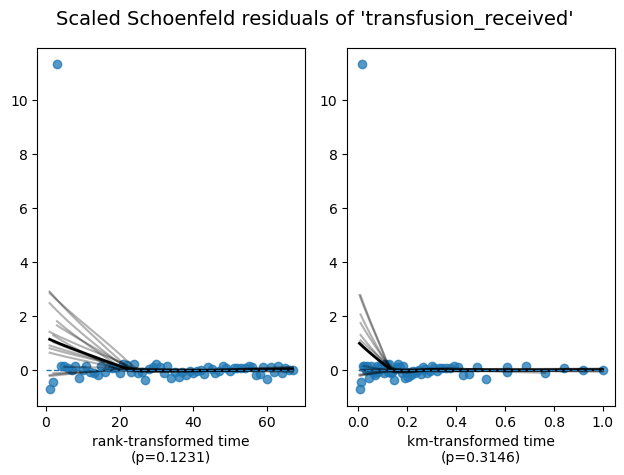

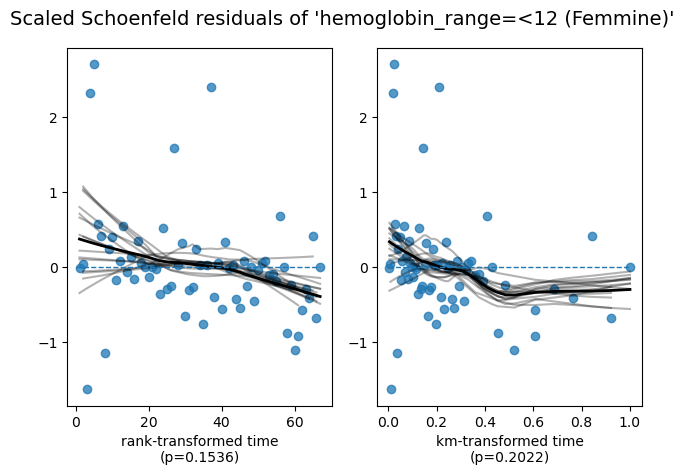

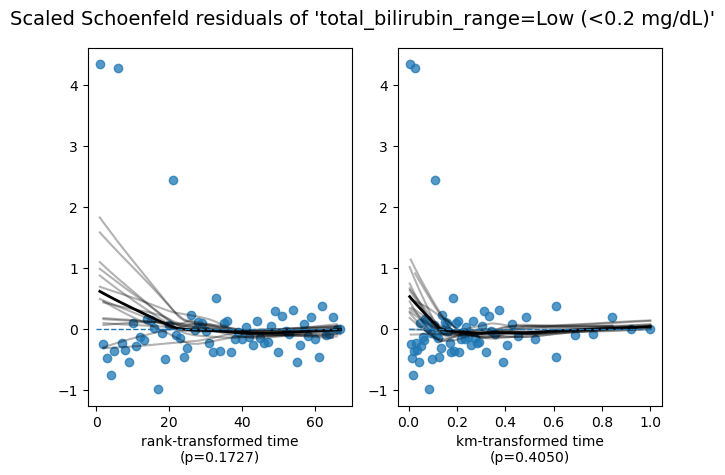

In [43]:
# =======================================
# Check Proportional Hazards Assumption
# =======================================
from lifelines.statistics import proportional_hazard_test
import pandas as pd

# Run PH test
ph_res = proportional_hazard_test(cph, df, time_transform="rank")
ph_tbl = ph_res.summary.copy()

# Inspect columns and pick the p-value column robustly
print("\nPH table columns:", list(ph_tbl.columns))

# Pick a p column by heuristic (supports lifelines variants)
p_candidates = [c for c in ph_tbl.columns if c.lower().strip().startswith("p")]
if not p_candidates:
    # fallback: any column that contains 'p' (e.g., 'p value')
    p_candidates = [c for c in ph_tbl.columns if 'p' in c.lower()]
if not p_candidates:
    raise RuntimeError("Could not find a p-value column in PH test summary.")

pcol = p_candidates[0]

# Print full table sorted by p
print("\n--- Proportional Hazards test (sorted by p) ---")
print(ph_tbl.sort_values(pcol))

# Global row if present
if isinstance(ph_tbl.index, pd.Index) and 'global' in ph_tbl.index:
    print(f"\nGlobal PH p-value: {ph_tbl.loc['global', pcol]:.4g}")
else:
    print("\nGlobal PH row not present in this lifelines version. Reporting per-variable results only.")

# Violators
violators = ph_tbl[ph_tbl[pcol] < 0.05].sort_values(pcol)
if len(violators):
    print("\nVariables with evidence of PH violation (p < 0.05):")
    print(violators[[pcol]])
else:
    print("\nNo significant PH violations detected.")

# Optional: show diagnostic plots for top 3 smallest p-values (if available)
to_plot = [ix for ix in ph_tbl.sort_values(pcol).index.tolist() if ix != 'global'][:3]
if len(to_plot):
    cph.check_assumptions(df, p_value_threshold=0.05, show_plots=True, columns=to_plot)


In [44]:
# =======================================
# Export PH Test Results
# =======================================

# 1. Export full PH table
ph_tbl.to_excel("cox_PH_test_results.xlsx", sheet_name="PH_Test", index=True)
ph_tbl.to_csv("cox_PH_test_results.csv", index=True)

print("\nSaved: cox_PH_test_results.xlsx and .csv")

# 2. Export variables with PH violation (if any)
if len(violators):
    violators.to_excel("cox_PH_violators_p_lt_0.05.xlsx", sheet_name="Violators", index=True)
    violators.to_csv("cox_PH_violators_p_lt_0.05.csv", index=True)
    print("Saved: cox_PH_violators_p_lt_0.05.xlsx and .csv")
else:
    print("No PH violators to export.")

# 3. Export global p-value if available
if 'global' in ph_tbl.index:
    global_p = ph_tbl.loc['global', pcol]
    gp = pd.DataFrame({"Global_PH_p_value":[global_p]})
    gp.to_excel("cox_global_PH_p_value.xlsx", index=False)
    print("Saved: cox_global_PH_p_value.xlsx")



Saved: cox_PH_test_results.xlsx and .csv
No PH violators to export.


In [45]:
# --- Robust Weibull AFT using screened features (cleaning + stable summary) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter
from lifelines.utils import concordance_index

# 1) Screened covariates present in the dataset
aft_features_raw = [
     'death_during_observation','observation_end_reason','white_blood_cells_range','surgical_intervention',
    'active_principles_n','adr_n_grado1','surgery_complications','platelet_count_range',
    'neutrophils_percent_range','end_reason_progression_any_line','adr_n_tot','red_blood_cells_range',
    'tumor_stage_roman','hemoglobin_range','observation_end_date','histological_grade','observation_days',
    'alt_gpt_range','ast_got_range','ordinary_hospitalizations_n','adr_n_grado3','treatment_line_n',
    'bmi_value','direct_bilirubin_range','alcohol_consumption'
]
aft_features_raw = [c for c in aft_features_raw if c in dataset.columns]

# 2) Ensure survival columns and durations
if 'Overall_Survival' not in dataset.columns:
    raise ValueError("Overall_Survival column is required (1 = death, 0 = censored).")

for dcol in ['observation_start_date','death_date','observation_end_date']:
    if dcol in dataset.columns:
        dataset[dcol] = pd.to_datetime(dataset[dcol], errors='coerce')

if 'survival_days' not in dataset.columns:
    if 'observation_start_date' not in dataset.columns:
        raise ValueError("observation_start_date is required to compute survival_days.")
    censor_date = dataset['observation_end_date'].where(
        dataset['observation_end_date'].notna(), pd.Timestamp.today()
    ) if 'observation_end_date' in dataset.columns else pd.Series(pd.Timestamp.today(), index=dataset.index)
    event_date = dataset['death_date'].where(dataset['death_date'].notna(), censor_date) \
                 if 'death_date' in dataset.columns else censor_date
    dataset['survival_days'] = (event_date - dataset['observation_start_date']).dt.days

# make sure durations are positive
dataset.loc[dataset['survival_days'] <= 0, 'survival_days'] = np.nan

# 3) Identify column types
binary_like = [
    'death_during_observation','surgical_intervention','surgery_complications','end_reason_progression_any_line'
]
binary_like = [c for c in binary_like if c in aft_features_raw]

factor_cols = [
    'observation_end_reason','tumor_stage_roman','histological_grade','alcohol_consumption'
]
factor_cols = [c for c in factor_cols if c in aft_features_raw]

numeric_candidate = [
    'white_blood_cells_range','active_principles_n','adr_n_grado1','platelet_count_range',
    'neutrophils_percent_range','adr_n_tot','red_blood_cells_range','hemoglobin_range',
    'observation_days','alt_gpt_range','ast_got_range','ordinary_hospitalizations_n',
    'adr_n_grado3','treatment_line_n','bmi_value','direct_bilirubin_range'
]
numeric_candidate = [c for c in numeric_candidate if c in aft_features_raw]

# 4) Build modeling frame
use_cols = list(set(aft_features_raw) - {'observation_end_date'})
aft_df = dataset[['survival_days','Overall_Survival'] + use_cols].copy()

# 4a) numeric coercion + median impute
for c in numeric_candidate:
    aft_df[c] = pd.to_numeric(aft_df[c], errors='coerce')
    if aft_df[c].notna().any():
        aft_df[c] = aft_df[c].fillna(aft_df[c].median())

# 4b) binary mapping with fill
yes_no_map = {
    'present / yes': 1, 'yes': 1, 'present': 1, 'positive': 1, 'y': 1, True: 1, 1: 1, '1': 1,
    'absent / no': 0, 'no': 0, 'absent': 0, 'negative': 0, 'n': 0, False: 0, 0: 0, '0': 0
}
for c in binary_like:
    s = aft_df[c].astype(str).str.strip().str.lower()
    s = s.replace(yes_no_map)
    aft_df[c] = pd.to_numeric(s, errors='coerce').fillna(0.0)

# 4c) one hot encode factors with explicit missing level
if factor_cols:
    dummies = pd.get_dummies(aft_df[factor_cols], drop_first=True, dummy_na=True, prefix=factor_cols)
    aft_df = pd.concat([aft_df.drop(columns=factor_cols), dummies], axis=1)

# 4d) drop columns that are all NaN or constant
aft_df = aft_df.dropna(axis=1, how='all')
const_cols = [c for c in aft_df.columns if c not in ['survival_days','Overall_Survival']
              and aft_df[c].nunique(dropna=True) <= 1]
if const_cols:
    aft_df = aft_df.drop(columns=const_cols)

# 4e) final cleaning
aft_df = aft_df.dropna(subset=['survival_days','Overall_Survival'])
aft_df['Overall_Survival'] = pd.to_numeric(aft_df['Overall_Survival'], errors='coerce').astype(int)
aft_df = aft_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# basic sanity
n_rows = len(aft_df)
n_events = int((aft_df['Overall_Survival'] == 1).sum())
n_cens = int((aft_df['Overall_Survival'] == 0).sum())
if n_rows == 0:
    raise ValueError("AFT dataset is empty after cleaning.")
if n_events == 0:
    raise ValueError("No death events in AFT dataset.")
if n_cens == 0:
    raise ValueError("No censored observations in AFT dataset.")

# 5) Fit Weibull AFT
aft = WeibullAFTFitter(penalizer=0.5)  # small ridge helps stability on wide models
covariate_cols = [c for c in aft_df.columns if c not in ['survival_days', 'Overall_Survival']]

# ensure numeric predictors
for c in covariate_cols:
    aft_df[c] = pd.to_numeric(aft_df[c], errors='coerce')
aft_df = aft_df.dropna(subset=covariate_cols)

aft.fit(
    aft_df[['survival_days', 'Overall_Survival'] + covariate_cols],
    duration_col='survival_days',
    event_col='Overall_Survival'
)

# 6) Tidy summary, compute Time Ratios (lambda terms), and save
aft_summary = aft.summary.copy()

# Flatten MultiIndex (param, covariate) if present, and standardize column names
if isinstance(aft_summary.index, pd.MultiIndex):
    idx_names = list(aft_summary.index.names)
    aft_summary = aft_summary.reset_index()
    if len(idx_names) >= 1 and idx_names[0] is not None:
        aft_summary.rename(columns={idx_names[0]: 'param'}, inplace=True)
    if len(idx_names) >= 2 and idx_names[1] is not None:
        aft_summary.rename(columns={idx_names[1]: 'covariate'}, inplace=True)
    if 'param' not in aft_summary.columns and 'level_0' in aft_summary.columns:
        aft_summary.rename(columns={'level_0': 'param'}, inplace=True)
    if 'covariate' not in aft_summary.columns and 'level_1' in aft_summary.columns:
        aft_summary.rename(columns={'level_1': 'covariate'}, inplace=True)
else:
    if 'param' not in aft_summary.columns:
        aft_summary['param'] = 'lambda_'
    if 'covariate' not in aft_summary.columns:
        aft_summary['covariate'] = aft_summary.index.astype(str)

# Time Ratio (on log-time scale)
aft_summary['Time_Ratio'] = np.exp(aft_summary['coef'])

# Keep lambda terms for covariate effects
lambda_df = aft_summary[aft_summary['param'].astype(str).str.contains('lambda', case=False, na=False)].copy()

# Save tidy outputs
aft_summary.to_excel("weibull_aft_model_summary_screened_clean.xlsx", index=False)
lambda_df.to_excel("weibull_aft_lambda_terms_screened_clean.xlsx", index=False)

# 7) Plot coefficients (lambda terms only)
if not lambda_df.empty:
    lambda_df = lambda_df.sort_values('coef', ascending=False)
    labels = lambda_df['covariate'].astype(str).tolist()

    plt.figure(figsize=(8, max(6, 0.3 * len(labels))))
    plt.barh(labels, lambda_df['coef'].values)
    plt.gca().invert_yaxis()
    plt.xlabel('Coefficient (log time)')
    plt.title('Weibull AFT - Coefficients (lambda terms)')
    plt.tight_layout()
    plt.savefig("weibull_aft_coefficients_screened_clean.png", dpi=200)
    plt.close()
else:
    print("No lambda_ rows found in AFT summary. Skipping coefficient plot.")

# 8) Concordance using predicted median survival as ranking
X = aft_df[covariate_cols]
pred_median = aft.predict_median(X)
c_index = concordance_index(
    aft_df['survival_days'],
    -pred_median,   # shorter predicted time -> higher risk
    event_observed=aft_df['Overall_Survival']
)
print(f"Weibull AFT Concordance index: {c_index:.3f}")


Weibull AFT Concordance index: 0.046


In [46]:
# ---------- Glue: make sure cox_df, aft_df, cph, aft exist ----------
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter, WeibullAFTFitter

# your screened predictors for Cox (same list you shared)
screened = [
    'age','age_group','gender','ethnicity','education_level','bmi_value','bmi_category',
    'employment_status','alcohol_consumption','smoking_status_binary','smoking_status_detail',
    'observation_end_reason','tumor_type','tumor_stage_tnm','tumor_stage_roman','histological_grade',
    'molecular_alterations','mutations_present','dpyd_genotype_known','dpyd_genotype_type',
    'surgical_intervention','previous_number_of_treatment_lines','surgery_complications',
    'oncology_treatment_lines_n','radiotherapy_status','transfusion_received','transfusions_total_n',
    'hypertension','aortic_insufficiency','dyslipidemia','bph','obesity_comorbidity',
    'ischemic_heart_disease','atrial_fibrillation','copd','asthma','diabetes_type_ii',
    'gastroesophageal_reflux_full','hypertensive_heart_disease','renal_insufficiency',
    'depressive_syndrome','anemia_comorbidity','psychiatric_disorders','other_comorbidities',
    'cardiovascular_disorders','gastrointestinal_disorders','cerebrovascular_disorders',
    'ordinary_hospitalizations_n','death_during_observation','adr_description','adr_n_tot',
    'adr_n_grado1','adr_n_grado2','adr_n_grado3','adr_n_grado4','adr_n_grado5','observation_days',
    'white_blood_cells_range','red_blood_cells_range','hemoglobin_range','neutrophils_percent_range',
    'platelet_count_range','creatinine_range','ast_got_range','alt_gpt_range','total_bilirubin_range',
    'direct_bilirubin_range','end_reason_progression_any_line','chemio_fine_tossicita',
    'end_reason_other_any_line','farmaci_cat_n','treatment_line_n','chemo_cycles_n','dose_reduced','active_principles_n',
    'comorbilita_cat','altro','adr_ctcae_grade','adr_outcome','adr_chemo_correlation'
]
screened = [c for c in screened if c in dataset.columns]

# 1) Build cox_df from screened only
def build_cox_df(raw):
    df = raw[['survival_days','Overall_Survival'] + screened].copy()
    # yes/no mapping
    yes_no = {'present / yes':1,'present yes':1,'yes':1,'present':1,'positive':1,
              'no':0,'absent':0,'absent / no':0,'negative':0,'yes/present':1,'no/absent':0}
    for c in screened:
        if df[c].dtype == 'object':
            lower = df[c].astype(str).str.lower().str.strip()
            # map if series looks yes/no-ish
            vals = set(v for v in lower.unique() if v not in {'nan',''})
            if vals and vals.issubset(set(yes_no.keys())):
                df[c] = pd.to_numeric(lower.replace(yes_no), errors='coerce').fillna(0.0)
    # treat these as strata to avoid huge dummy explosions
    strata_cols = [c for c in ['tumor_stage_tnm','observation_end_reason'] if c in df.columns and df[c].dtype=='object']
    # one-hot remaining objects with rare collapse
    obj = [c for c in screened if c not in strata_cols and df[c].dtype == 'object']
    for c in obj:
        vc = df[c].value_counts()
        rare = vc[vc < 5].index
        df[c] = df[c].replace(rare, 'RARE')
    if obj:
        df = pd.get_dummies(df, columns=obj, drop_first=True, dummy_na=True)
    # drop zero variance overall or within event/censored
    events = df['Overall_Survival'] == 1
    drop_cols = []
    for c in df.columns:
        if c in ['survival_days','Overall_Survival'] + strata_cols:
            continue
        if df[c].var() == 0 or df.loc[events, c].var() == 0 or df.loc[~events, c].var() == 0:
            drop_cols.append(c)
    if drop_cols:
        df = df.drop(columns=list(set(drop_cols)))
    # cast predictors to float
    for c in df.columns:
        if c not in ['survival_days','Overall_Survival'] + strata_cols:
            df[c] = pd.to_numeric(df[c], errors='coerce').astype(float)
    # return df and strata list to reuse
    return df, strata_cols

# Only build if cox_df not already in memory
if 'cox_df' not in globals():
    cox_df, cox_strata = build_cox_df(dataset)
else:
    # if you already have cox_strata, keep it, else infer
    cox_strata = [c for c in ['tumor_stage_tnm','observation_end_reason'] if c in cox_df.columns and c in dataset.columns and dataset[c].dtype=='object']

# Ensure aft_df exists (use your earlier AFT build). If not, quickly rebuild from your AFT features:
if 'aft_df' not in globals():
    aft_features_raw = [
        'death_during_observation','observation_end_reason','white_blood_cells_range','surgical_intervention',
        'active_principles_n','adr_n_grado1','surgery_complications','platelet_count_range',
        'neutrophils_percent_range','end_reason_progression_any_line','adr_n_tot','red_blood_cells_range',
        'tumor_stage_roman','hemoglobin_range','histological_grade','observation_days',
        'alt_gpt_range','ast_got_range','ordinary_hospitalizations_n','adr_n_grado3','treatment_line_n',
        'bmi_value','direct_bilirubin_range','alcohol_consumption'
    ]
    aft_features_raw = [c for c in aft_features_raw if c in dataset.columns]
    aft_df = dataset[['survival_days','Overall_Survival'] + aft_features_raw].copy()
    # quick numeric coercion for numeric-like
    for c in aft_features_raw:
        if aft_df[c].dtype != 'object':
            aft_df[c] = pd.to_numeric(aft_df[c], errors='coerce')
    # map yes/no-like
    yes_no = {'present / yes':1,'present yes':1,'yes':1,'present':1,'positive':1,
              'no':0,'absent':0,'absent / no':0,'negative':0,'yes/present':1,'no/absent':0}
    bin_like = ['death_during_observation','surgical_intervention','surgery_complications','end_reason_progression_any_line']
    for c in [x for x in bin_like if x in aft_features_raw]:
        s = aft_df[c].astype(str).str.lower().str.strip().replace(yes_no)
        aft_df[c] = pd.to_numeric(s, errors='coerce').fillna(0.0)
    # one-hot for the rest
    factors = [c for c in ['observation_end_reason','tumor_stage_roman','histological_grade','alcohol_consumption'] if c in aft_features_raw]
    if factors:
        dummies = pd.get_dummies(aft_df[factors], drop_first=True, dummy_na=True, prefix=factors)
        aft_df = pd.concat([aft_df.drop(columns=factors), dummies], axis=1)
    # clean
    aft_df = aft_df.replace([np.inf,-np.inf], np.nan).dropna(subset=['survival_days','Overall_Survival']).dropna(axis=0)

# Fit models if needed
if 'cph' not in globals():
    cph = CoxPHFitter(penalizer=1.5)
    cph.fit(cox_df, duration_col='survival_days', event_col='Overall_Survival',
            strata=[c for c in ['tumor_stage_tnm','observation_end_reason'] if c in cox_df.columns], robust=True)

if 'aft' not in globals():
    aft = WeibullAFTFitter(penalizer=0.5)
    covs = [c for c in aft_df.columns if c not in ['survival_days','Overall_Survival']]
    for c in covs:
        aft_df[c] = pd.to_numeric(aft_df[c], errors='coerce')
    aft_df = aft_df.dropna(subset=covs)
    aft.fit(aft_df[['survival_days','Overall_Survival'] + covs],
            duration_col='survival_days', event_col='Overall_Survival')

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from lifelines import CoxPHFitter, WeibullAFTFitter

# ---------- Helpers ----------
def tidy_cox_effects(cph):
    s = cph.summary.copy()
    s = s.replace([np.inf, -np.inf], np.nan).dropna(subset=["coef"])
    s["variable"] = s.index.astype(str)
    s = s[~s["variable"].str.contains("Intercept", case=False, na=False)]
    # Effect on risk scale
    s["HR"] = np.exp(s["coef"])
    s["log_effect"] = np.abs(np.log(s["HR"]))  # = abs(coef)
    s["Model"] = "CoxPH"
    return s[["variable","coef","HR","log_effect","coef lower 95%","coef upper 95%"]]

def tidy_aft_effects(aft):
    summ = aft.summary.copy()
    if isinstance(summ.index, pd.MultiIndex):
        summ = summ.reset_index().rename(columns={summ.index.names[0] or "level_0":"param",
                                                  summ.index.names[1] or "level_1":"covariate"})
    if "param" not in summ.columns:
        summ["param"] = "lambda_"
    if "covariate" not in summ.columns:
        summ["covariate"] = summ.index.astype(str)

    # Keep lambda_ terms (covariate effects on log-time)
    lam = summ[summ["param"].astype(str).str.contains("lambda", case=False, na=False)].copy()
    lam = lam.replace([np.inf, -np.inf], np.nan).dropna(subset=["coef"])
    lam["variable"] = lam["covariate"].astype(str)
    lam = lam[~lam["variable"].str.contains("Intercept", case=False, na=False)]
    # Time ratio on time scale and convert to risk scale by 1/TR
    lam["TR"] = np.exp(lam["coef"])
    lam["risk_effect"] = 1.0 / lam["TR"]
    lam["log_effect"] = np.abs(np.log(lam["risk_effect"]))  # = abs(-coef)
    lam["Model"] = "WeibullAFT"
    # keep CI cols if present
    ci_cols = [c for c in ["coef lower 95%","coef upper 95%"] if c in lam.columns]
    keep = ["variable","coef","TR","risk_effect","log_effect","Model"] + ci_cols
    return lam[keep]

def bootstrap_coefs(df, model_class, duration_col, event_col, n_boot=100, random_seed=42, lambda_only=False):
    """Return bootstrap coefficient matrix (rows=boots, cols=variables on *coefficient* scale)."""
    rng = np.random.RandomState(random_seed)
    mats = []
    col_order = None
    for i in range(n_boot):
        b = resample(df, replace=True, random_state=int(rng.randint(0, 10_000_000)))
        try:
            m = model_class()
            m.fit(b, duration_col=duration_col, event_col=event_col)
            if model_class is WeibullAFTFitter:
                params = m.params_
                if isinstance(params, pd.DataFrame) and "lambda_" in params.index:
                    coefs = params.loc["lambda_"].copy()
                else:
                    # fallback: use summary
                    coefs = m.summary.reset_index().set_index("covariate")["coef"]
            else:
                # CoxPHFitter: params_ is Series of betas
                coefs = m.params_.copy()
            # keep a consistent set of columns
            if col_order is None:
                col_order = coefs.index.tolist()
            coefs = coefs.reindex(col_order)
            mats.append(coefs)
        except Exception:
            continue
    if not mats:
        return pd.DataFrame()
    M = pd.DataFrame(mats)
    # Drop columns that were never estimated
    M = M.dropna(axis=1, how="all")
    return M

def winsorize(series, q=0.95):
    # clip at the given upper percentile (leave lower at 0 for |log_effect|)
    if series.notna().any():
        upper = series.quantile(q)
        return series.clip(upper=upper)
    return series

# ---------- 1) Tidy effects ----------
cox_eff = tidy_cox_effects(cph)
aft_eff = tidy_aft_effects(aft)

# ---------- 2) Bootstrap stability ----------
cox_boot = bootstrap_coefs(cox_df, CoxPHFitter, "survival_days", "Overall_Survival", n_boot=100)
aft_boot = bootstrap_coefs(aft_df, WeibullAFTFitter, "survival_days", "Overall_Survival", n_boot=100)

def attach_stability(eff_df, boot_mat, model_name):
    out = eff_df.copy()
    out["sd_coef"] = np.nan
    out["sel_freq"] = np.nan  # fraction of successful bootstrap fits providing a finite coef
    if boot_mat is None or boot_mat.empty:
        return out
    # Align names
    common = [v for v in out["variable"] if v in boot_mat.columns]
    if not common:
        return out
    sd = boot_mat[common].std(axis=0, skipna=True)
    sel = boot_mat[common].notna().mean(axis=0)
    out.loc[out["variable"].isin(common), "sd_coef"] = out["variable"].map(sd).values
    out.loc[out["variable"].isin(common), "sel_freq"] = out["variable"].map(sel).values
    return out

cox_eff = attach_stability(cox_eff, cox_boot, "CoxPH")
aft_eff = attach_stability(aft_eff, aft_boot, "WeibullAFT")

# Fill missing stability with conservative values
for df_ in (cox_eff, aft_eff):
    df_["sd_coef"] = df_["sd_coef"].fillna(df_["sd_coef"].median() if df_["sd_coef"].notna().any() else 0.25)
    df_["sel_freq"] = df_["sel_freq"].fillna(0.5)

# ---------- 3) Compute RI per model ----------
def compute_RI(df, effect_col_name):
    # Use log_effect as magnitude, winsorize to 95th percentile
    df = df.copy()
    df["log_effect_w"] = winsorize(df["log_effect"], q=0.95)
    # stability term
    eps = 0.05  # floor to avoid divide-by-zero and over-dominance
    denom = (df["sd_coef"].fillna(0.0) + eps)
    score_raw = (df["log_effect_w"] / denom) * df["sel_freq"]
    # min-max scale within model
    if score_raw.max() > score_raw.min():
        df["RI_model"] = (score_raw - score_raw.min()) / (score_raw.max() - score_raw.min())
    else:
        df["RI_model"] = 0.0
    return df

cox_eff = compute_RI(cox_eff, "HR")
aft_eff = compute_RI(aft_eff, "risk_effect")

cox_eff["Model"] = "CoxPH"
aft_eff["Model"] = "WeibullAFT"

# ---------- 4) Merge models and compute combined RI ----------
common_cols = ["variable","Model","log_effect","sd_coef","sel_freq"]
extra_cols_cox = ["HR","coef lower 95%","coef upper 95%"] if "coef lower 95%" in cox_eff.columns else ["HR"]
extra_cols_aft = ["risk_effect","TR"]
cox_keep = cox_eff[common_cols + ["RI_model"] + extra_cols_cox]
aft_keep = aft_eff[common_cols + ["RI_model"] + extra_cols_aft]

ri_all = pd.concat([cox_keep, aft_keep], ignore_index=True)

# Combined RI: average the within-model RI when a variable appears in multiple models
comb = (ri_all
        .groupby("variable", as_index=False)
        .agg(Combined_RI=("RI_model","mean"),
             Models=("Model","unique"),
             Mean_log_effect=("log_effect","mean"),
             Mean_sd=("sd_coef","mean"),
             Mean_sel=("sel_freq","mean")))

# Attach readable effects per model back for export
ri_export = ri_all.copy()
ri_export = ri_export.merge(
    comb[["variable","Combined_RI","Models","Mean_log_effect","Mean_sd","Mean_sel"]],
    on="variable", how="left"
)

# ---------- 5) Sort and save ----------
ri_export_sorted = ri_export.sort_values(["Combined_RI","RI_model"], ascending=False)

# Remove the intercept if any slipped in and drop any exact zero Combined_RI rows only if everything else nonzero
ri_export_sorted = ri_export_sorted[~ri_export_sorted["variable"].str.contains("Intercept", case=False, na=False)]

ri_export_sorted.to_excel("RI_Significance_Table_robust.xlsx", index=False)

# ---------- 6) Plot a presentable top-15 ----------
top = (ri_export_sorted
       .drop_duplicates(subset=["variable"])
       .sort_values("Combined_RI", ascending=False)
       .head(15))

plt.figure(figsize=(9, max(6, 0.45*len(top))))
plt.barh(top["variable"], top["Combined_RI"])
plt.gca().invert_yaxis()
plt.xlabel("Relative Importance (combined across models)")
plt.title("RI Significance - Top Predictors (robust scoring)")
plt.tight_layout()
plt.savefig("RI_Significance_Top15_robust.png", dpi=220)
plt.close()

print("Saved: RI_Significance_Table_robust.xlsx and RI_Significance_Top15_robust.png")


Saved: RI_Significance_Table_robust.xlsx and RI_Significance_Top15_robust.png


In [49]:
# Select only the outcome columns 
outcome_cols = [
    "patient_id",
    "Overall_Survival",
    "Severe_ADRs",
    "readmission_flag",
    "survival_days"
]

# Filter dataset
outcome_df = dataset[outcome_cols].copy()


# Save to output directory
output_path = r"C:\Users\HP\OneDrive\Desktop\VERO_code\Phase_2\results\tables\outcome.csv"
outcome_df.to_csv(output_path, index=False)

print(f"Outcome dataframe created and saved to:\n{output_path}")
print(f"Shape: {outcome_df.shape}")

Outcome dataframe created and saved to:
C:\Users\HP\OneDrive\Desktop\VERO_code\Phase_2\results\tables\outcome.csv
Shape: (403, 5)


In [50]:
import pandas as pd
import numpy as np
from pathlib import Path

# Load cleaned_data.xlsx
path = Path("C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_1/data/processed/cleaned_data.xlsx")
df = pd.read_excel(path)

df.shape, df.columns[:40]

((403, 112),
 Index(['patient_id', 'birth_date', 'age', 'age_group', 'gender', 'ethnicity',
        'education_level', 'bmi_value', 'bmi_category', 'employment_status',
        'alcohol_consumption', 'smoking_status_binary', 'smoking_status_detail',
        'smoking_years', 'observation_start_date', 'observation_end_date',
        'observation_end_reason', 'tumor_diagnosis_date',
        'oncology_unit_start_date', 'tumor_type', 'tumor_stage_tnm',
        'tumor_stage_roman', 'histological_grade', 'molecular_alterations',
        'mutations_present', 'dpyd_genotype_known', 'dpyd_genotype_type',
        'surgical_intervention', 'surgery_date', 'surgery_type',
        'prior_surgery', 'previous number of treatment lines',
        'other surgical intervention', 'surgery_complications',
        'oncology_treatment_lines_n', 'radiotherapy_status',
        'transfusion_received', 'transfusions_total_n', 'hypertension',
        'aortic_insufficiency'],
       dtype='object'))

In [51]:
df.columns[40:90]

Index(['dyslipidemia', 'bph', 'obesity_comorbidity', 'ischemic_heart_disease',
       'atrial_fibrillation', 'copd', 'asthma', 'diabetes_type_ii',
       'gastroesophageal_reflux_full', 'hypertensive_heart_disease',
       'renal_insufficiency', 'depressive_syndrome', 'anemia_comorbidity',
       'psychiatric_disorders', 'other_comorbidities',
       'cardiovascular_disorders', 'gastrointestinal_disorders',
       'cerebrovascular_disorders', 'ordinary_hospitalizations_n',
       'death_during_observation', 'adr_left', 'adr_n_tot', 'adr_n_grado1',
       'adr_n_grado2', 'adr_n_grado3', 'adr_n_grado4', 'adr_n_grado5',
       'observation_days', 'blood_glucose_range', 'white_blood_cells_range',
       'red_blood_cells_range', 'hemoglobin_range',
       'neutrophils_percent_range', 'platelet_count_range', 'creatinine_range',
       'ast_got_range', 'alt_gpt_range', 'total_bilirubin_range',
       'direct_bilirubin_range', 'death_date',
       'end_reason_progression_any_line', 'chemio_fin

In [52]:
df.columns[90:]

Index(['active_principles_n', 'Oncologic treatment line',
       'Hospitalizations count', 'side effect', 'comorbidities',
       'comobidity_cat', 'other', 'data', 'comorbidity_category_list',
       'number of other pathologies', 'adr_description', 'adr_onset_date',
       'adr_ctcae_grade', 'adr_outcome', 'adr_chemo_correlation',
       'adr_chemo_action', 'adr_source_project', 'adr_macro_category',
       'adr_clean.1', 'albumin_range', 'hospital_admission_date',
       'hospital_discharge_date'],
      dtype='object')

In [53]:
# Quick look at some key fields user mentioned
summary = {
    "smoking_status_binary": df["smoking_status_binary"].value_counts(dropna=False),
    "bmi_category": df["bmi_category"].value_counts(dropna=False),
    "smoking_status_detail": df["smoking_status_detail"].value_counts(dropna=False),
    "tumor_stage_roman": df["tumor_stage_roman"].value_counts(dropna=False),
    "adr_ctcae_grade": df["adr_ctcae_grade"].describe(),
    "albumin_range": df["albumin_range"].value_counts(dropna=False) if "albumin_range" in df.columns else "MISSING",
}
summary

{'smoking_status_binary': smoking_status_binary
 1    301
 0    102
 Name: count, dtype: int64,
 'bmi_category': bmi_category
 18.5-24.9 Normal Weight    235
 25-29.99 Overweight        112
 >=30 Obese                  41
 <18.5 Underweight           15
 Name: count, dtype: int64,
 'smoking_status_detail': smoking_status_detail
 Not Known / Missing    134
 Ex-Smoker              128
 Never Smoked           102
 Current Smoker          39
 Name: count, dtype: int64,
 'tumor_stage_roman': tumor_stage_roman
 Not Known / Missing    135
 Stage IV               123
 Stage III               96
 Stage II                45
 Stage I                  3
 I                        1
 Name: count, dtype: int64,
 'adr_ctcae_grade': count    403.000000
 mean       1.410220
 std        0.478587
 min        1.000000
 25%        1.142857
 50%        1.285714
 75%        1.500000
 max        4.000000
 Name: adr_ctcae_grade, dtype: float64,
 'albumin_range': albumin_range
 Unknown                  186
 Norm

In [54]:
# Check comorbidity-like columns
comorb_cols = [
    'hypertension', 'aortic_insufficiency', 'dyslipidemia', 'bph',
    'obesity_comorbidity', 'ischemic_heart_disease', 'atrial_fibrillation',
    'copd', 'asthma', 'diabetes_type_ii', 'gastroesophageal_reflux_full',
    'hypertensive_heart_disease', 'renal_insufficiency', 'depressive_syndrome',
    'anemia_comorbidity', 'psychiatric_disorders', 'other_comorbidities',
    'cardiovascular_disorders', 'gastrointestinal_disorders',
    'cerebrovascular_disorders'
]
present_comorb = [c for c in comorb_cols if c in df.columns]
present_comorb


['hypertension',
 'aortic_insufficiency',
 'dyslipidemia',
 'bph',
 'obesity_comorbidity',
 'ischemic_heart_disease',
 'atrial_fibrillation',
 'copd',
 'asthma',
 'diabetes_type_ii',
 'gastroesophageal_reflux_full',
 'hypertensive_heart_disease',
 'renal_insufficiency',
 'depressive_syndrome',
 'anemia_comorbidity',
 'psychiatric_disorders',
 'other_comorbidities',
 'cardiovascular_disorders',
 'gastrointestinal_disorders',
 'cerebrovascular_disorders']

In [55]:
# Peek at a couple of comorbidity distributions to see coding ("Present / Yes" etc.)
comorb_preview = {c: df[c].value_counts(dropna=False).head() for c in present_comorb[:6]}
comorb_preview

{'hypertension': hypertension
 Absent / No      269
 Present / Yes    134
 Name: count, dtype: int64,
 'aortic_insufficiency': aortic_insufficiency
 Absent / No      401
 Present / Yes      2
 Name: count, dtype: int64,
 'dyslipidemia': dyslipidemia
 Absent / No      362
 Present / Yes     41
 Name: count, dtype: int64,
 'bph': bph
 Absent / No      386
 Present / Yes     17
 Name: count, dtype: int64,
 'obesity_comorbidity': obesity_comorbidity
 Absent / No      394
 Present / Yes      9
 Name: count, dtype: int64,
 'ischemic_heart_disease': ischemic_heart_disease
 Absent / No      376
 Present / Yes     27
 Name: count, dtype: int64}

In [56]:
# 1. Map comorbidity columns to 0/1 flags
def map_yes_no(series):
    return series.replace({
        "Present / Yes": 1,
        "Absent / No": 0
    })

binary_comorbid_cols = {}
for c in present_comorb:
    binary_col = c + "_bin"
    df[binary_col] = map_yes_no(df[c])
    binary_comorbid_cols[c] = binary_col

binary_comorbid_cols


{'hypertension': 'hypertension_bin',
 'aortic_insufficiency': 'aortic_insufficiency_bin',
 'dyslipidemia': 'dyslipidemia_bin',
 'bph': 'bph_bin',
 'obesity_comorbidity': 'obesity_comorbidity_bin',
 'ischemic_heart_disease': 'ischemic_heart_disease_bin',
 'atrial_fibrillation': 'atrial_fibrillation_bin',
 'copd': 'copd_bin',
 'asthma': 'asthma_bin',
 'diabetes_type_ii': 'diabetes_type_ii_bin',
 'gastroesophageal_reflux_full': 'gastroesophageal_reflux_full_bin',
 'hypertensive_heart_disease': 'hypertensive_heart_disease_bin',
 'renal_insufficiency': 'renal_insufficiency_bin',
 'depressive_syndrome': 'depressive_syndrome_bin',
 'anemia_comorbidity': 'anemia_comorbidity_bin',
 'psychiatric_disorders': 'psychiatric_disorders_bin',
 'other_comorbidities': 'other_comorbidities_bin',
 'cardiovascular_disorders': 'cardiovascular_disorders_bin',
 'gastrointestinal_disorders': 'gastrointestinal_disorders_bin',
 'cerebrovascular_disorders': 'cerebrovascular_disorders_bin'}

In [57]:
# 2. Construct Charlson Comorbidity Index (CCI) with pragmatic mapping

def compute_cci(row):
    cci = 0
    
    # Diabetes (without complications)
    if 'diabetes_type_ii_bin' in row and row['diabetes_type_ii_bin'] == 1:
        cci += 1
    
    # Cardiovascular disease: MI/ischemic, atrial fibrillation, hypertension-related heart disease
    cardio_sources = [
        'ischemic_heart_disease_bin',
        'cardiovascular_disorders_bin',
        'atrial_fibrillation_bin',
        'hypertensive_heart_disease_bin'
    ]
    if any((col in row and row[col] == 1) for col in cardio_sources):
        cci += 1  # lumped as 1-point cardiovascular category
    
    # Cerebrovascular disease
    if 'cerebrovascular_disorders_bin' in row and row['cerebrovascular_disorders_bin'] == 1:
        cci += 1
    
    # Chronic pulmonary disease (COPD/asthma)
    if (('copd_bin' in row and row['copd_bin'] == 1) or 
        ('asthma_bin' in row and row['asthma_bin'] == 1)):
        cci += 1
    
    # Renal disease (moderate/severe CKD proxy)
    if 'renal_insufficiency_bin' in row and row['renal_insufficiency_bin'] == 1:
        cci += 2
    
    # Solid tumor / metastatic tumor using tumor_stage_roman as proxy
    stage = row.get('tumor_stage_roman', np.nan)
    if pd.notna(stage):
        s = str(stage).strip().upper()
        if "IV" in s:
            cci += 6  # metastatic solid tumor
        elif "I" in s or "II" in s or "III" in s:
            # any non metastatic solid tumor
            cci += 2
    
    return cci

df["CCI_score"] = df.apply(compute_cci, axis=1)

# 3. ACCI: add age-based points
def compute_age_points(age):
    # Standard ACCI categorisation:
    # <50: 0, 50-59: +1, 60-69: +2, 70-79: +3, >=80: +4
    if pd.isna(age):
        return 0
    try:
        a = float(age)
    except Exception:
        return 0
    if a < 50:
        return 0
    elif a < 60:
        return 1
    elif a < 70:
        return 2
    elif a < 80:
        return 3
    else:
        return 4

df["age_points_acci"] = df["age"].apply(compute_age_points)
df["ACCI_score"] = df["CCI_score"] + df["age_points_acci"]

df[["age", "CCI_score", "age_points_acci", "ACCI_score"]].head()


,age,CCI_score,age_points_acci,ACCI_score
0,73,7,3,10
1,58,2,1,3
2,84,6,4,10
3,76,3,3,6
4,70,6,3,9


In [58]:
import numpy as np
import pandas as pd

# If your main dataframe is called "dataset", uncomment this:
# df = dataset.copy()

# 1. List of comorbidity variables in the cleaned data
comorbidity_cols = [
    "hypertension",
    "aortic_insufficiency",
    "dyslipidemia",
    "bph",
    "obesity_comorbidity",
    "ischemic_heart_disease",
    "atrial_fibrillation",
    "copd",
    "asthma",
    "diabetes_type_ii",
    "gastroesophageal_reflux_full",
    "hypertensive_heart_disease",
    "renal_insufficiency",
    "depressive_syndrome",
    "anemia_comorbidity",
    "psychiatric_disorders",
    "other_comorbidities",
    "cardiovascular_disorders",
    "gastrointestinal_disorders",
    "cerebrovascular_disorders",
]

# 2. Create 0/1 binary versions for each comorbidity: "<name>_bin"
for col in comorbidity_cols:
    if col in df.columns:
        bin_col = col + "_bin"
        df[bin_col] = (
            df[col]
            .astype(str)
            .str.strip()
            .replace(
                {
                    "Present / Yes": 1,
                    "Absent / No": 0,
                    "present / yes": 1,
                    "absent / no": 0,
                    "Yes": 1,
                    "No": 0,
                    "yes": 1,
                    "no": 0,
                }
            )
        )
        # force numeric and keep NaN where mapping failed
        df[bin_col] = pd.to_numeric(df[bin_col], errors="coerce")

# 3. Collect all *_bin columns that actually exist
bin_cols = [c for c in df.columns if c.endswith("_bin")]
print("Binary comorbidity columns used:", bin_cols)

# 4. Compute comorbidity_count as sum of all binary comorbidity flags
df["comorbidity_count"] = (
    df[bin_cols]
    .apply(pd.to_numeric, errors="coerce")  # make sure everything is numeric
    .fillna(0)
    .sum(axis=1)
)

# 5. Categorise into 0-2 / 3-5 / >=6
def comorbidity_cat_fn(n):
    if pd.isna(n):
        return np.nan
    n = float(n)
    if n <= 2:
        return "0-2"
    elif n <= 5:
        return "3-5"
    else:
        return ">=6"

df["comorbidity_burden_cat"] = df["comorbidity_count"].apply(comorbidity_cat_fn)

# 6. Quick sanity checks
print(df["comorbidity_count"].describe())
print(df["comorbidity_burden_cat"].value_counts(dropna=False))
df[["comorbidity_count", "comorbidity_burden_cat"]].head()


Binary comorbidity columns used: ['hypertension_bin', 'aortic_insufficiency_bin', 'dyslipidemia_bin', 'bph_bin', 'obesity_comorbidity_bin', 'ischemic_heart_disease_bin', 'atrial_fibrillation_bin', 'copd_bin', 'asthma_bin', 'diabetes_type_ii_bin', 'gastroesophageal_reflux_full_bin', 'hypertensive_heart_disease_bin', 'renal_insufficiency_bin', 'depressive_syndrome_bin', 'anemia_comorbidity_bin', 'psychiatric_disorders_bin', 'other_comorbidities_bin', 'cardiovascular_disorders_bin', 'gastrointestinal_disorders_bin', 'cerebrovascular_disorders_bin']
count    403.000000
mean       1.019851
std        1.376636
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        9.000000
Name: comorbidity_count, dtype: float64
comorbidity_burden_cat
0-2    345
3-5     56
>=6      2
Name: count, dtype: int64


,comorbidity_count,comorbidity_burden_cat
0,3.0,3-5
1,1.0,0-2
2,1.0,0-2
3,2.0,0-2
4,0.0,0-2


In [59]:
# 5. Tumor stage grouping: Stage I-II, Stage III, Stage IV

def stage_group_fn(stage):
    if pd.isna(stage):
        return np.nan
    s = str(stage).strip().upper()
    # Harmonise variants like "Stage II" vs "II"
    if "IV" in s:
        return "Stage IV"
    elif "III" in s:
        return "Stage III"
    elif "II" in s or "I" in s:
        return "Stage I-II"
    else:
        return np.nan

df["tumor_stage_group"] = df["tumor_stage_roman"].apply(stage_group_fn)
df["tumor_stage_group"].value_counts(dropna=False)


tumor_stage_group
Stage I-II    184
Stage IV      123
Stage III      96
Name: count, dtype: int64

In [60]:
# 6. BMI categories: collapse labels into four canonical groups

def bmi_group_fn(label):
    if pd.isna(label):
        return np.nan
    s = str(label).lower()
    if "underweight" in s or "<18.5" in s:
        return "Underweight"
    if "normal" in s or "18.5-24.9" in s:
        return "Normal weight"
    if "overweight" in s or "25-29.99" in s:
        return "Overweight"
    if "obese" in s or ">=30" in s:
        return "Obese"
    return np.nan

df["bmi_group"] = df["bmi_category"].apply(bmi_group_fn)
df["bmi_group"].value_counts(dropna=False)


bmi_group
Normal weight    235
Overweight       112
Obese             41
Underweight       15
Name: count, dtype: int64

In [61]:
# 7. Ordinary hospitalisations categories

def hosp_cat_fn(n):
    if pd.isna(n):
        return np.nan
    try:
        n_val = int(n)
    except Exception:
        return np.nan
    if n_val == 0:
        return "0"
    elif n_val <= 2:
        return "1-2"
    else:
        return ">=3"

df["ordinary_hosp_cat"] = df["ordinary_hospitalizations_n"].apply(hosp_cat_fn)
df["ordinary_hosp_cat"].value_counts(dropna=False)

ordinary_hosp_cat
0      293
1-2     99
>=3     11
Name: count, dtype: int64

In [62]:
import pandas as pd
import numpy as np
from pathlib import Path

# Reload to be safe after previous error
path = Path('C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_1/data/processed/cleaned_data.xlsx')
df = pd.read_excel(path)

df.shape


(403, 112)

In [63]:
# Build a compact variable dictionary: original -> derived
var_dict_rows = []

# ACCI / CCI
var_dict_rows.append({"source_column": "age + comorbidities + tumor_stage_roman", "analysis_variable": "CCI_score"})
var_dict_rows.append({"source_column": "CCI_score + age", "analysis_variable": "ACCI_score"})

# Comorbidity burden
var_dict_rows.append({"source_column": ", ".join(present_comorb), "analysis_variable": "comorbidity_count"})
var_dict_rows.append({"source_column": "comorbidity_count", "analysis_variable": "comorbidity_burden_cat (0-2, 3-5, >=6)"})

# Tumor stage
var_dict_rows.append({"source_column": "tumor_stage_roman", "analysis_variable": "tumor_stage_group (Stage I-II, Stage III, Stage IV)"})

# BMI
var_dict_rows.append({"source_column": "bmi_category", "analysis_variable": "bmi_group (Underweight, Normal weight, Overweight, Obese)"})

# Ordinary hospitalisations
var_dict_rows.append({"source_column": "ordinary_hospitalizations_n", "analysis_variable": "ordinary_hosp_cat (0, 1-2, >=3)"})

# Lab abnormalities
if "hemoglobin_range" in df.columns:
    var_dict_rows.append({"source_column": "hemoglobin_range", "analysis_variable": "low_hemoglobin (1=low, 0=normal/high)"})
if "creatinine_range" in df.columns:
    var_dict_rows.append({"source_column": "creatinine_range", "analysis_variable": "elevated_creatinine (1=high, 0=normal/low)"})
if "albumin_range" in df.columns:
    var_dict_rows.append({"source_column": "albumin_range", "analysis_variable": "low_albumin (1=low, 0=normal/high) (currently all missing)"})

var_dict = pd.DataFrame(var_dict_rows)

# Save enriched dataset and variable dictionary
out_data_path = Path("C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_2/results/hospital requirement/cleaned_data_phase1_enriched.xlsx")
out_dict_path = Path("C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_2/results/hospital requirement/variable_dictionary_phase1.xlsx")
df.to_excel(out_data_path, index=False)
var_dict.to_excel(out_dict_path, index=False)

out_data_path, out_dict_path

(WindowsPath('C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_2/results/hospital requirement/cleaned_data_phase1_enriched.xlsx'),
 WindowsPath('C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_2/results/hospital requirement/variable_dictionary_phase1.xlsx'))

In [64]:
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
from pathlib import Path

# Load cleaned_data.xlsx
path = Path("C:/Users/HP/OneDrive/Desktop/VERO_code/Phase_1/data/processed/cleaned_data.xlsx")
df = pd.read_excel(path)

# ---------------------------------------------------
# 1) DEFINE COMORBIDITY COLUMNS AND BINARY MAPPING
# ---------------------------------------------------

# Helper to map yes/no-like strings to 0/1
def map_yes_no_series(s):
    if s is None:
        return s
    return s.replace({
        "Present / Yes": 1,
        "Absent / No": 0,
        "present / yes": 1,
        "absent / no": 0,
        "Yes": 1,
        "No": 0,
        "yes": 1,
        "no": 0
    })

# List of comorbidity columns we want to use (only those that exist will be used)
comorb_cols = [
    "hypertension",
    "aortic_insufficiency",
    "dyslipidemia",
    "bph",
    "obesity_comorbidity",
    "ischemic_heart_disease",
    "atrial_fibrillation",
    "copd",
    "asthma",
    "diabetes_type_ii",
    "gastroesophageal_reflux_full",
    "hypertensive_heart_disease",
    "renal_insufficiency",
    "depressive_syndrome",
    "anemia_comorbidity",
    "psychiatric_disorders",
    "other_comorbidities",
    "cardiovascular_disorders",
    "gastrointestinal_disorders",
    "cerebrovascular_disorders"
]

present_comorb = [c for c in comorb_cols if c in df.columns]

binary_comorbid_cols = {}

for c in present_comorb:
    binary_col = c + "_bin"

    # Start from the original column
    col_series = df[c]

    # Step 1: if it is object/string-like, map yes/no strings
    if col_series.dtype == "object":
        col_series = map_yes_no_series(col_series)

    # Step 2: force numeric (anything non numeric -> NaN)
    col_series = pd.to_numeric(col_series, errors="coerce")

    # Step 3: standardize to 0/1 (anything >=1 becomes 1, rest 0, NaN remains NaN)
    col_bin = np.where(col_series >= 1, 1,
                       np.where(col_series == 0, 0, np.nan))

    df[binary_col] = col_bin
    binary_comorbid_cols[c] = binary_col

print("Binary comorbidity columns created:")
print(list(binary_comorbid_cols.values()))

# ---------------------------------------------------
# 2) CHARLSON COMORBIDITY INDEX (CCI) AND ACCI
# ---------------------------------------------------

def compute_cci(row):
    cci = 0

    # Diabetes (without complications)
    if row.get("diabetes_type_ii_bin", 0) == 1:
        cci += 1

    # Cardiovascular disease cluster (count as 1 block)
    cardio_sources = [
        "ischemic_heart_disease_bin",
        "cardiovascular_disorders_bin",
        "atrial_fibrillation_bin",
        "hypertensive_heart_disease_bin"
    ]
    if any(row.get(col, 0) == 1 for col in cardio_sources):
        cci += 1

    # Cerebrovascular disease
    if row.get("cerebrovascular_disorders_bin", 0) == 1:
        cci += 1

    # Chronic pulmonary disease (COPD or asthma)
    if (row.get("copd_bin", 0) == 1) or (row.get("asthma_bin", 0) == 1):
        cci += 1

    # Renal disease
    if row.get("renal_insufficiency_bin", 0) == 1:
        cci += 2

    # Solid vs metastatic tumor using tumor_stage_roman
    stage = row.get("tumor_stage_roman", np.nan)
    if pd.notna(stage):
        s = str(stage).strip().upper()
        # Very simple rule: IV = metastatic, I/II/III = solid tumor
        if "IV" in s:
            cci += 6   # metastatic solid tumor
        elif any(k in s for k in ["I", "II", "III"]):
            cci += 2   # non metastatic solid tumor

    return cci

df["CCI_score"] = df.apply(compute_cci, axis=1)

def compute_age_points(age):
    if pd.isna(age):
        return 0
    try:
        a = float(age)
    except Exception:
        return 0
    if a < 50:
        return 0
    elif a < 60:
        return 1
    elif a < 70:
        return 2
    elif a < 80:
        return 3
    else:
        return 4

df["age_points_acci"] = df["age"].apply(compute_age_points)
df["ACCI_score"] = df["CCI_score"] + df["age_points_acci"]

# ---------------------------------------------------
# 3) COMORBIDITY BURDEN CATEGORIES
# ---------------------------------------------------

# Take the list of binary columns we actually created
bin_cols = [col for col in binary_comorbid_cols.values() if col in df.columns]

# Clean them again just to be 100 percent sure they are numeric
df[bin_cols] = df[bin_cols].apply(pd.to_numeric, errors="coerce")

# Now safely compute the count
df["comorbidity_count"] = df[bin_cols].fillna(0).sum(axis=1)

def comorbidity_cat_fn(n):
    if pd.isna(n):
        return np.nan
    n = float(n)
    if n <= 2:
        return "0-2"
    elif n <= 5:
        return "3-5"
    else:
        return ">=6"

df["comorbidity_burden_cat"] = df["comorbidity_count"].apply(comorbidity_cat_fn)

# ---------------------------------------------------
# 4) TUMOR STAGE GROUPING
# ---------------------------------------------------

def stage_group_fn(stage):
    if pd.isna(stage):
        return np.nan
    s = str(stage).strip().upper()
    if "IV" in s:
        return "Stage IV"
    elif "III" in s:
        return "Stage III"
    elif "II" in s or "I" in s:
        return "Stage I-II"
    else:
        return np.nan

df["tumor_stage_group"] = df["tumor_stage_roman"].apply(stage_group_fn)

# ---------------------------------------------------
# 5) BMI GROUPING (NORMAL / UNDER / OVER / OBESE)
# ---------------------------------------------------

def bmi_group_fn(label):
    if pd.isna(label):
        return np.nan
    s = str(label).lower()
    if "underweight" in s or "<18.5" in s:
        return "Underweight"
    if "normal" in s or "18.5-24.9" in s:
        return "Normal weight"
    if "overweight" in s or "25-29.99" in s:
        return "Overweight"
    if "obese" in s or ">=30" in s:
        return "Obese"
    return np.nan

df["bmi_group"] = df["bmi_category"].apply(bmi_group_fn)

# ---------------------------------------------------
# 6) ORDINARY HOSPITALISATIONS CATEGORIES (0 / 1-2 / >=3)
# ---------------------------------------------------

def hosp_cat_fn(n):
    if pd.isna(n):
        return np.nan
    try:
        n_val = int(n)
    except Exception:
        return np.nan
    if n_val == 0:
        return "0"
    elif n_val <= 2:
        return "1-2"
    else:
        return ">=3"

df["ordinary_hosp_cat"] = df["ordinary_hospitalizations_n"].apply(hosp_cat_fn)

# ---------------------------------------------------
# 7) LAB ABNORMALITY FLAGS
# ---------------------------------------------------

# Low hemoglobin
if "hemoglobin_range" in df.columns:
    def low_hb_fn(cat):
        if pd.isna(cat):
            return np.nan
        s = str(cat).lower()
        return 1 if "low" in s else 0
    df["low_hemoglobin"] = df["hemoglobin_range"].apply(low_hb_fn)
else:
    df["low_hemoglobin"] = np.nan

# Elevated creatinine
if "creatinine_range" in df.columns:
    def elevated_creat_fn(cat):
        if pd.isna(cat):
            return np.nan
        s = str(cat).lower()
        return 1 if ("high" in s or "elevated" in s) else 0
    df["elevated_creatinine"] = df["creatinine_range"].apply(elevated_creat_fn)
else:
    df["elevated_creatinine"] = np.nan

# Low albumin
if "albumin_range" in df.columns:
    def low_alb_fn(cat):
        if pd.isna(cat):
            return np.nan
        s = str(cat).lower()
        return 1 if "low" in s else 0
    df["low_albumin"] = df["albumin_range"].apply(low_alb_fn)
else:
    df["low_albumin"] = np.nan

# ---------------------------------------------------
# 8) QUICK SANITY CHECKS
# ---------------------------------------------------

print("\n=== CCI and ACCI ===")
print(df[["CCI_score", "ACCI_score"]].describe())

print("\n=== Comorbidity burden categories ===")
print(df["comorbidity_burden_cat"].value_counts(dropna=False))

print("\n=== Tumor stage group ===")
print(df["tumor_stage_group"].value_counts(dropna=False))

print("\n=== BMI group ===")
print(df["bmi_group"].value_counts(dropna=False))

print("\n=== Ordinary hospitalisations cat ===")
print(df["ordinary_hosp_cat"].value_counts(dropna=False))

print("\n=== Lab flags ===")
print("low_hemoglobin:")
print(df["low_hemoglobin"].value_counts(dropna=False))
print("\nelevated_creatinine:")
print(df["elevated_creatinine"].value_counts(dropna=False))
print("\nlow_albumin:")
print(df["low_albumin"].value_counts(dropna=False))


Binary comorbidity columns created:
['hypertension_bin', 'aortic_insufficiency_bin', 'dyslipidemia_bin', 'bph_bin', 'obesity_comorbidity_bin', 'ischemic_heart_disease_bin', 'atrial_fibrillation_bin', 'copd_bin', 'asthma_bin', 'diabetes_type_ii_bin', 'gastroesophageal_reflux_full_bin', 'hypertensive_heart_disease_bin', 'renal_insufficiency_bin', 'depressive_syndrome_bin', 'anemia_comorbidity_bin', 'psychiatric_disorders_bin', 'other_comorbidities_bin', 'cardiovascular_disorders_bin', 'gastrointestinal_disorders_bin', 'cerebrovascular_disorders_bin']

=== CCI and ACCI ===
        CCI_score  ACCI_score
count  403.000000  403.000000
mean     3.573201    5.585608
std      1.939759    2.324323
min      2.000000    2.000000
25%      2.000000    4.000000
50%      2.000000    5.000000
75%      6.000000    7.000000
max      8.000000   11.000000

=== Comorbidity burden categories ===
comorbidity_burden_cat
0-2    345
3-5     56
>=6      2
Name: count, dtype: int64

=== Tumor stage group ===
tumor

In [65]:
import numpy as np
import pandas as pd

# ---------------------------------------------------
# Ensure observation dates are parsed
# ---------------------------------------------------
date_cols_to_parse = ["observation_start_date", "observation_end_date"]

for col in date_cols_to_parse:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    else:
        print(f"WARNING: column {col} not found in df")

# ---------------------------------------------------
# Helper to extract the earliest ADR date
# ---------------------------------------------------
def first_date_from_string(val):
    """
    Handles strings like:
    - '2023-07-18'
    - '2023-01-10; 2023-01-31; 2023-02-21'
    Returns the earliest valid datetime or NaT.
    """
    if pd.isna(val):
        return pd.NaT
    s = str(val).strip()
    if s == "":
        return pd.NaT
    
    parts = [p.strip() for p in s.split(";")]
    # Parse each part to datetime
    parsed = pd.to_datetime(parts, errors="coerce")
    
    # parsed is a DatetimeIndex/array
    if hasattr(parsed, "min"):
        return parsed.min()
    else:
        # Defensive fallback (should rarely be needed)
        valid_dates = [d for d in parsed if not pd.isna(d)]
        return min(valid_dates) if valid_dates else pd.NaT

if "adr_onset_date" in df.columns:
    df["adr_first_date"] = df["adr_onset_date"].apply(first_date_from_string)
else:
    print("WARNING: adr_onset_date column not found")
    df["adr_first_date"] = pd.NaT

# ---------------------------------------------------
# Severe ADR event flag (Grade >= 3)
# ---------------------------------------------------
if "adr_ctcae_grade" in df.columns:
    df["severe_adr_event"] = np.where(
        (df["adr_ctcae_grade"].notna()) & (df["adr_ctcae_grade"] >= 3),
        1,
        0
    )
else:
    print("WARNING: adr_ctcae_grade column not found")
    df["severe_adr_event"] = np.nan

# ---------------------------------------------------
# Define ADR end date = event date (if event) or observation_end_date
# ---------------------------------------------------
def adr_end_date_fn(row):
    # if severe ADR event, use earliest ADR date
    if row.get("severe_adr_event", 0) == 1:
        # if adr_first_date is missing for some reason, fall back to observation_end_date
        if pd.notna(row.get("adr_first_date", pd.NaT)):
            return row["adr_first_date"]
        else:
            return row["observation_end_date"]
    else:
        # no severe event: censored at observation_end_date
        return row["observation_end_date"]

df["adr_end_date"] = df.apply(adr_end_date_fn, axis=1)
df["adr_end_date"] = pd.to_datetime(df["adr_end_date"], errors="coerce")

# ---------------------------------------------------
# ADR follow-up time in days and person-years
# ---------------------------------------------------
df["adr_followup_days"] = (
    df["adr_end_date"] - df["observation_start_date"]
).dt.days

# Avoid zero or negative times (just in case)
df["adr_followup_days"] = df["adr_followup_days"].clip(lower=1)

df["adr_followup_py"] = df["adr_followup_days"] / 365.25

# ---------------------------------------------------
# Quick sanity checks
# ---------------------------------------------------
print("\n=== Severe ADR event flag ===")
print(df["severe_adr_event"].value_counts(dropna=False))

print("\n=== ADR follow-up (days) summary ===")
print(df["adr_followup_days"].describe())

print("\n=== ADR follow-up (person-years) summary ===")
print(df["adr_followup_py"].describe())

# Optional: check a few rows to ensure dates make sense
print("\nSample of ADR-related columns:")
print(
    df[
        [
            "observation_start_date",
            "adr_onset_date",
            "adr_first_date",
            "observation_end_date",
            "adr_end_date",
            "severe_adr_event",
            "adr_followup_days"
        ]
    ].head(10)
)



=== Severe ADR event flag ===
severe_adr_event
0    390
1     13
Name: count, dtype: int64

=== ADR follow-up (days) summary ===
count     231.000000
mean      496.229437
std       322.882647
min         6.000000
25%       197.500000
50%       476.000000
75%       822.500000
max      1085.000000
Name: adr_followup_days, dtype: float64

=== ADR follow-up (person-years) summary ===
count    231.000000
mean       1.358602
std        0.884005
min        0.016427
25%        0.540726
50%        1.303217
75%        2.251882
max        2.970568
Name: adr_followup_py, dtype: float64

Sample of ADR-related columns:
  observation_start_date                                     adr_onset_date  \
0                    NaT                             2023-01-29; 2023-03-15   
1             2022-04-22                                                NaN   
2                    NaT                             2023-04-05; 2023-05-13   
3                    NaT                                              

In [66]:
import numpy as np
import pandas as pd

# ---------------------------------------------------
# 0. Parse relevant date columns safely
# ---------------------------------------------------
date_cols = [
    "observation_start_date",
    "observation_end_date",
    "hospital_admission_date",
    "hospital_discharge_date",
]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    else:
        print(f"WARNING: column {col} not found")


# ---------------------------------------------------
# 1. Extract earliest ADR date from adr_onset_date
# ---------------------------------------------------
def first_date_from_string(val):
    if pd.isna(val):
        return pd.NaT
    s = str(val).strip()
    if s == "":
        return pd.NaT
    parts = [p.strip() for p in s.split(";")]
    parsed = pd.to_datetime(parts, errors="coerce")
    valid_dates = parsed[~pd.isna(parsed)]
    return valid_dates.min() if len(valid_dates) > 0 else pd.NaT

df["adr_first_date"] = df["adr_onset_date"].apply(first_date_from_string)


# ---------------------------------------------------
# 2. Severe ADR event flag (Grade >= 3)
# ---------------------------------------------------
df["severe_adr_event"] = np.where(
    (df["adr_ctcae_grade"].notna()) & (df["adr_ctcae_grade"] >= 3),
    1,
    0
)


# ---------------------------------------------------
# 3. Build ADR START DATE with fallback:
#    observation_start_date first, else hospital_admission_date
# ---------------------------------------------------
def adr_start_fn(row):
    if pd.notna(row.get("observation_start_date", pd.NaT)):
        return row["observation_start_date"]
    else:
        return row.get("hospital_admission_date", pd.NaT)

df["adr_start_date"] = df.apply(adr_start_fn, axis=1)


# ---------------------------------------------------
# 4. ADR END DATE:
#    - If severe ADR event → use earliest ADR date
#    - Else → use observation_end_date
# ---------------------------------------------------
def adr_end_fn(row):
    if row.get("severe_adr_event", 0) == 1:
        if pd.notna(row.get("adr_first_date", pd.NaT)):
            return row["adr_first_date"]
        else:
            return row.get("observation_end_date", pd.NaT)
    else:
        return row.get("observation_end_date", pd.NaT)

df["adr_end_date"] = df.apply(adr_end_fn, axis=1)
df["adr_end_date"] = pd.to_datetime(df["adr_end_date"], errors="coerce")


# ---------------------------------------------------
# 5. Follow-up time for ADR outcome (days + person-years)
# ---------------------------------------------------
df["adr_followup_days"] = (
    df["adr_end_date"] - df["adr_start_date"]
).dt.days

# Clip negatives (if end < start)
df["adr_followup_days"] = df["adr_followup_days"].clip(lower=1)

df["adr_followup_py"] = df["adr_followup_days"] / 365.25


# ---------------------------------------------------
# 6. Diagnostics
# ---------------------------------------------------
print("\n=== Severe ADR event flag ===")
print(df["severe_adr_event"].value_counts(dropna=False))

print("\n=== Missing ADR start dates after fallback ===")
print(df["adr_start_date"].isna().sum())

print("\n=== Missing ADR end dates ===")
print(df["adr_end_date"].isna().sum())

print("\n=== ADR follow-up (days) summary ===")
print(df["adr_followup_days"].describe())

print("\n=== ADR follow-up (person-years) summary ===")
print(df["adr_followup_py"].describe())

# Show sample rows
print("\nSample ADR window rows:")
print(
    df[
        [
            "adr_start_date",
            "adr_end_date",
            "severe_adr_event",
            "adr_followup_days",
            "observation_start_date",
            "hospital_admission_date"
        ]
    ].head(15)
)



=== Severe ADR event flag ===
severe_adr_event
0    390
1     13
Name: count, dtype: int64

=== Missing ADR start dates after fallback ===
138

=== Missing ADR end dates ===
164

=== ADR follow-up (days) summary ===
count     234.000000
mean      490.230769
std       325.135030
min         1.000000
25%       193.500000
50%       472.000000
75%       816.500000
max      1085.000000
Name: adr_followup_days, dtype: float64

=== ADR follow-up (person-years) summary ===
count    234.000000
mean       1.342179
std        0.890171
min        0.002738
25%        0.529774
50%        1.292266
75%        2.235455
max        2.970568
Name: adr_followup_py, dtype: float64

Sample ADR window rows:
   adr_start_date adr_end_date  severe_adr_event  adr_followup_days  \
0             NaT          NaT                 0                NaN   
1      2022-04-22   2022-07-18                 0               87.0   
2             NaT          NaT                 0                NaN   
3      2024-07-02     

In [67]:
import numpy as np
import pandas as pd

# 1. Make sure date columns are parsed (re-run safely)
date_cols = [
    "observation_start_date",
    "observation_end_date",
    "hospital_admission_date",
    "hospital_discharge_date",
]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# 2. Rebuild adr_first_date (idempotent, safe to overwrite)
def first_date_from_string(val):
    if pd.isna(val):
        return pd.NaT
    s = str(val).strip()
    if s == "":
        return pd.NaT
    parts = [p.strip() for p in s.split(";")]
    parsed = pd.to_datetime(parts, errors="coerce")
    valid_dates = parsed[~pd.isna(parsed)]
    return valid_dates.min() if len(valid_dates) > 0 else pd.NaT

df["adr_first_date"] = df["adr_onset_date"].apply(first_date_from_string)

# 3. Severe ADR flag (keep as before)
df["severe_adr_event"] = np.where(
    (df["adr_ctcae_grade"].notna()) & (df["adr_ctcae_grade"] >= 3),
    1,
    0
)

# 4. New ADR START DATE with extended fallback
def adr_start_fn2(row):
    # Order of preference
    for col in [
        "observation_start_date",
        "hospital_admission_date",
        "hospital_discharge_date",
        "adr_first_date"  # last resort
    ]:
        val = row.get(col, pd.NaT)
        if pd.notna(val):
            return val
    return pd.NaT

df["adr_start_date"] = df.apply(adr_start_fn2, axis=1)

# 5. New ADR END DATE with fallback
def adr_end_fn2(row):
    # If severe ADR event, prefer earliest ADR date
    if row.get("severe_adr_event", 0) == 1:
        if pd.notna(row.get("adr_first_date", pd.NaT)):
            return row["adr_first_date"]
        # fallback if adr_first_date missing
        for col in ["observation_end_date", "hospital_discharge_date"]:
            val = row.get(col, pd.NaT)
            if pd.notna(val):
                return val
        return pd.NaT
    else:
        # No severe ADR event: censor at end of observation or discharge
        for col in ["observation_end_date", "hospital_discharge_date"]:
            val = row.get(col, pd.NaT)
            if pd.notna(val):
                return val
        return pd.NaT

df["adr_end_date"] = df.apply(adr_end_fn2, axis=1)
df["adr_end_date"] = pd.to_datetime(df["adr_end_date"], errors="coerce")

# 6. Follow-up time in days and person-years
df["adr_followup_days"] = (df["adr_end_date"] - df["adr_start_date"]).dt.days

# remove negatives (if any)
df["adr_followup_days"] = df["adr_followup_days"].clip(lower=1)

df["adr_followup_py"] = df["adr_followup_days"] / 365.25

# 7. Diagnostics
print("=== Severe ADR event flag ===")
print(df["severe_adr_event"].value_counts(dropna=False), "\n")

print("Missing ADR start dates:", df["adr_start_date"].isna().sum())
print("Missing ADR end dates:", df["adr_end_date"].isna().sum(), "\n")

print("=== ADR follow-up (days) summary ===")
print(df["adr_followup_days"].describe(), "\n")

print("=== ADR follow-up (person-years) summary ===")
print(df["adr_followup_py"].describe(), "\n")

print("Sample ADR window rows:")
print(
    df[
        [
            "adr_start_date",
            "adr_end_date",
            "severe_adr_event",
            "adr_followup_days",
            "observation_start_date",
            "hospital_admission_date",
            "hospital_discharge_date",
            "adr_first_date"
        ]
    ].head(15)
)


=== Severe ADR event flag ===
severe_adr_event
0    390
1     13
Name: count, dtype: int64 

Missing ADR start dates: 36
Missing ADR end dates: 133 

=== ADR follow-up (days) summary ===
count     270.000000
mean      427.348148
std       343.141085
min         1.000000
25%       109.500000
50%       353.000000
75%       724.250000
max      1085.000000
Name: adr_followup_days, dtype: float64 

=== ADR follow-up (person-years) summary ===
count    270.000000
mean       1.170015
std        0.939469
min        0.002738
25%        0.299795
50%        0.966461
75%        1.982888
max        2.970568
Name: adr_followup_py, dtype: float64 

Sample ADR window rows:
   adr_start_date adr_end_date  severe_adr_event  adr_followup_days  \
0      2023-01-29          NaT                 0                NaN   
1      2022-04-22   2022-07-18                 0               87.0   
2      2023-04-05          NaT                 0                NaN   
3      2024-07-02   2024-07-05                 0  

In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Restrict to patients with non-missing follow-up and defined event
df_adr = df.copy()

df_adr = df_adr[
    df_adr["adr_followup_py"].notna() &
    (df_adr["adr_followup_py"] > 0) &
    df_adr["severe_adr_event"].notna()
].copy()

print("N included in ADR IRR analysis:", len(df_adr))

# 2) Create age group (<=65 vs >65) for the table
def make_age_group(a):
    try:
        if pd.isna(a):
            return np.nan
        a = float(a)
        return "<=65" if a <= 65 else ">65"
    except Exception:
        return np.nan

df_adr["age_group_65"] = df_adr["age"].apply(make_age_group)

print(df_adr["age_group_65"].value_counts(dropna=False))


N included in ADR IRR analysis: 270
age_group_65
<=65    146
>65     124
Name: count, dtype: int64


In [69]:
# Age group
df_adr["age_group_65"] = df_adr["age_group_65"].astype("category")
df_adr["age_group_65"] = df_adr["age_group_65"].cat.reorder_categories(
    ["<=65", ">65"], ordered=True
)

# Comorbidity burden
if "comorbidity_burden_cat" in df_adr.columns:
    df_adr["comorbidity_burden_cat"] = df_adr["comorbidity_burden_cat"].astype("category")
    df_adr["comorbidity_burden_cat"] = df_adr["comorbidity_burden_cat"].cat.reorder_categories(
        ["0-2", "3-5", ">=6"], ordered=True
    )

# Tumor stage group
df_adr["tumor_stage_group"] = df_adr["tumor_stage_group"].astype("category")
df_adr["tumor_stage_group"] = df_adr["tumor_stage_group"].cat.reorder_categories(
    ["Stage I-II", "Stage III", "Stage IV"], ordered=True
)

# BMI group
df_adr["bmi_group"] = df_adr["bmi_group"].astype("category")
df_adr["bmi_group"] = df_adr["bmi_group"].cat.reorder_categories(
    ["Normal weight", "Underweight", "Overweight", "Obese"], ordered=True
)

# Ordinary hospitalisations category (0, 1-2, >=3) if used later
if "ordinary_hosp_cat" in df_adr.columns:
    df_adr["ordinary_hosp_cat"] = df_adr["ordinary_hosp_cat"].astype("category")
    df_adr["ordinary_hosp_cat"] = df_adr["ordinary_hosp_cat"].cat.reorder_categories(
        ["0", "1-2", ">=3"], ordered=True
    )

# Lab flags to numeric 0/1 (if not already)
for lab_col in ["low_hemoglobin", "elevated_creatinine", "low_albumin"]:
    if lab_col in df_adr.columns:
        df_adr[lab_col] = df_adr[lab_col].astype("float")


In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy.linalg as npl

def fit_poisson_irr(formula, data, offset_col):
    """
    Fits a Poisson model with log(offset_col) and returns IRR table.
    - Uses robust HC0 covariance by default.
    - If robust covariance fails with singular matrix, falls back to non-robust.
    - If the model is still singular (e.g. no variation in predictor), returns (None, None).
    """

    # Drop rows with missing outcome, offset or any vars in the formula
    model = smf.glm(
        formula=formula,
        data=data,
        family=sm.families.Poisson(),
        offset=np.log(data[offset_col])
    )

    try:
        res = model.fit(cov_type="HC0")
    except npl.LinAlgError:
        print(f"Warning: robust covariance failed (singular matrix) for:\n  {formula}\nFalling back to non-robust covariance.")
        try:
            res = model.fit()
        except npl.LinAlgError:
            print(f"Error: even non-robust fit failed (singular matrix) for:\n  {formula}\nReturning None.")
            return None, None

    coef = res.params
    se = res.bse

    irr = np.exp(coef)
    lower = np.exp(coef - 1.96 * se)
    upper = np.exp(coef + 1.96 * se)

    out = pd.DataFrame({
        "term": coef.index,
        "coef": coef,
        "IRR": irr,
        "CI_lower": lower,
        "CI_upper": upper,
        "p_value": res.pvalues
    })

    return res, out


In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy.linalg as npl

# -------------------------------------------------------------------
# Helper: check if a predictor has at least 2 distinct non-missing values
# -------------------------------------------------------------------
def has_variation(series):
    return series.dropna().nunique() >= 2

# -------------------------------------------------------------------
# Helper: fit Poisson with offset, return IRR table, robust to singularities
# -------------------------------------------------------------------
def fit_poisson_irr(formula, data, offset_col):
    """
    Fits a Poisson model with log(offset_col) as offset and returns:
      - res: fitted statsmodels results
      - out: DataFrame with term, coef, IRR, CI_lower, CI_upper, p_value

    Handles:
      - robust HC0 covariance by default
      - falls back to non-robust covariance if HC0 fails (singular matrix)
      - returns (None, None) if both fail
    """

    # Drop rows with missing offset first
    df = data.copy()
    df = df.loc[df[offset_col].notna()].copy()

    if df.empty:
        print(f"Skipping model (no data after dropping missing offset): {formula}")
        return None, None

    # Build model
    model = smf.glm(
        formula=formula,
        data=df,
        family=sm.families.Poisson(),
        offset = np.log(df[offset_col])
    )

    # Try robust covariance
    try:
        res = model.fit(cov_type="HC0")
    except npl.LinAlgError:
        print(f"Warning: robust covariance failed (singular matrix) for:\n  {formula}\nFalling back to non-robust covariance.")
        try:
            res = model.fit()
        except npl.LinAlgError:
            print(f"Error: even non-robust fit failed (singular matrix) for:\n  {formula}\nReturning None.")
            return None, None

    coef = res.params
    se = res.bse

    irr = np.exp(coef)
    lower = np.exp(coef - 1.96 * se)
    upper = np.exp(coef + 1.96 * se)

    out = pd.DataFrame({
        "term": coef.index,
        "coef": coef,
        "IRR": irr,
        "CI_lower": lower,
        "CI_upper": upper,
        "p_value": res.pvalues
    })

    return res, out

# -------------------------------------------------------------------
# Unadjusted Poisson models for severe_adr_event (incidence rate)
# -------------------------------------------------------------------

unadj_results = {}

# 1) Age group (<=65 vs >65)
formula_age_group_unadj = "severe_adr_event ~ C(age_group_65)"
res_age_group_u, tab_age_group_u = fit_poisson_irr(formula_age_group_unadj, df_adr, "adr_followup_py")
unadj_results["age_group"] = tab_age_group_u

# 2) Age continuous (per year)
formula_age_cont_unadj = "severe_adr_event ~ age"
res_age_cont_u, tab_age_cont_u = fit_poisson_irr(formula_age_cont_unadj, df_adr, "adr_followup_py")
unadj_results["age_cont"] = tab_age_cont_u

# 3) ACCI (per 1-point increase)
formula_acci_unadj = "severe_adr_event ~ ACCI_score"
res_acci_u, tab_acci_u = fit_poisson_irr(formula_acci_unadj, df_adr, "adr_followup_py")
unadj_results["ACCI"] = tab_acci_u

# 4) CCI (per 1-point increase)
formula_cci_unadj = "severe_adr_event ~ CCI_score"
res_cci_u, tab_cci_u = fit_poisson_irr(formula_cci_unadj, df_adr, "adr_followup_py")
unadj_results["CCI"] = tab_cci_u

# 5) Comorbidity burden categories (0-2 ref)
formula_comb_unadj = "severe_adr_event ~ C(comorbidity_burden_cat)"
res_comb_u, tab_comb_u = fit_poisson_irr(formula_comb_unadj, df_adr, "adr_followup_py")
unadj_results["comorbidity_burden"] = tab_comb_u

# 6) Tumor stage group (Stage I-II ref)
formula_stage_unadj = "severe_adr_event ~ C(tumor_stage_group)"
res_stage_u, tab_stage_u = fit_poisson_irr(formula_stage_unadj, df_adr, "adr_followup_py")
unadj_results["tumor_stage"] = tab_stage_u

# 7) Chemo cycles (per additional cycle)
# Make sure 'chemo_cycles_n' is the right column name in df_adr
formula_chemo_unadj = "severe_adr_event ~ chemo_cycles_n"
res_chemo_u, tab_chemo_u = fit_poisson_irr(formula_chemo_unadj, df_adr, "adr_followup_py")
unadj_results["chemo_cycles"] = tab_chemo_u

# 8) BMI category (Normal weight ref)
formula_bmi_unadj = "severe_adr_event ~ C(bmi_group)"
res_bmi_u, tab_bmi_u = fit_poisson_irr(formula_bmi_unadj, df_adr, "adr_followup_py")
unadj_results["bmi_group"] = tab_bmi_u

# 9) Lab abnormalities (one at a time), with variation checks

# low hemoglobin
if "low_hemoglobin" in df_adr.columns and has_variation(df_adr["low_hemoglobin"]):
    formula_hb_unadj = "severe_adr_event ~ low_hemoglobin"
    res_hb_u, tab_hb_u = fit_poisson_irr(formula_hb_unadj, df_adr, "adr_followup_py")
    unadj_results["low_hb"] = tab_hb_u
else:
    print("Skipping low_hemoglobin model: no variation or column missing in ADR subset.")
    unadj_results["low_hb"] = None

# elevated creatinine
if "elevated_creatinine" in df_adr.columns and has_variation(df_adr["elevated_creatinine"]):
    formula_creat_unadj = "severe_adr_event ~ elevated_creatinine"
    res_creat_u, tab_creat_u = fit_poisson_irr(formula_creat_unadj, df_adr, "adr_followup_py")
    unadj_results["elev_creat"] = tab_creat_u
else:
    print("Skipping elevated_creatinine model: no variation or column missing in ADR subset.")
    unadj_results["elev_creat"] = None

# low albumin
if "low_albumin" in df_adr.columns and has_variation(df_adr["low_albumin"]):
    formula_alb_unadj = "severe_adr_event ~ low_albumin"
    res_alb_u, tab_alb_u = fit_poisson_irr(formula_alb_unadj, df_adr, "adr_followup_py")
    unadj_results["low_alb"] = tab_alb_u
else:
    print("Skipping low_albumin model: no variation or column missing in ADR subset.")
    unadj_results["low_alb"] = None

# Example: inspect one
tab_age_group_u


Skipping low_hemoglobin model: no variation or column missing in ADR subset.
Skipping elevated_creatinine model: no variation or column missing in ADR subset.


,term,coef,IRR,CI_lower,CI_upper,p_value
Intercept,Intercept,-4.467975,0.011471,0.002835,0.046412,3.724647e-10
C(age_group_65)[T.>65],C(age_group_65)[T.>65],1.712588,5.543289,1.168132,26.305298,3.111440e-02


In [72]:
# See which models ran successfully
{key: (val is not None) for key, val in unadj_results.items()}

# Look at age group IRRs
unadj_results["age_group"]


,term,coef,IRR,CI_lower,CI_upper,p_value
Intercept,Intercept,-4.467975,0.011471,0.002835,0.046412,3.724647e-10
C(age_group_65)[T.>65],C(age_group_65)[T.>65],1.712588,5.543289,1.168132,26.305298,3.111440e-02


In [73]:
# Adjusted model for severe ADRs (Grade ≥3)
# Adjusted for:
# - age_group_65 (<=65 vs >65)
# - ACCI_score
# - tumor_stage_group
# - chemo_cycles_n
# - bmi_group
# - low_hemoglobin, elevated_creatinine, low_albumin

formula_adr_adj = """
severe_adr_event ~ C(age_group_65)
                  + ACCI_score
                  + C(tumor_stage_group)
                  + chemo_cycles_n
                  + C(bmi_group)
                  + low_hemoglobin
                  + elevated_creatinine
                  + low_albumin
"""

res_adr_adj, tab_adr_adj = fit_poisson_irr(formula_adr_adj, df_adr, "adr_followup_py")

tab_adr_adj


  
severe_adr_event ~ C(age_group_65)
                  + ACCI_score
                  + C(tumor_stage_group)
                  + chemo_cycles_n
                  + C(bmi_group)
                  + low_hemoglobin
                  + elevated_creatinine
                  + low_albumin

Falling back to non-robust covariance.


,term,coef,IRR,CI_lower,CI_upper,p_value
Intercept,Intercept,-1.928152,1.454167e-01,0.005846,3.617197,0.239634
C(age_group_65)[T.>65],C(age_group_65)[T.>65],0.969942,2.637792e+00,0.321107,21.668631,0.366668
C(tumor_stage_group)[T.Stage III],C(tumor_stage_group)[T.Stage III],0.984935,2.677637e+00,0.366333,19.571661,0.331796
C(tumor_stage_group)[T.Stage IV],C(tumor_stage_group)[T.Stage IV],-0.012374,9.877018e-01,0.057671,16.915810,0.993188
C(bmi_group)[T.Underweight],C(bmi_group)[T.Underweight],-17.266702,3.170784e-08,0.000000,inf,0.998787
C(bmi_group)[T.Overweight],C(bmi_group)[T.Overweight],0.821275,2.273397e+00,0.438050,11.798501,0.328306
C(bmi_group)[T.Obese],C(bmi_group)[T.Obese],0.932457,2.540744e+00,0.268887,24.007820,0.415789
ACCI_score,ACCI_score,0.329438,1.390187e+00,0.742824,2.601718,0.302888
chemo_cycles_n,chemo_cycles_n,-0.692382,5.003828e-01,0.346380,0.722855,0.000225
low_hemoglobin,low_hemoglobin,0.000000,1.000000e+00,1.000000,1.000000,NaN


In [74]:
age_row_adj = tab_adr_adj.loc[tab_adr_adj["term"] == "C(age_group_65)[T.>65]"].copy()
age_row_adj


,term,coef,IRR,CI_lower,CI_upper,p_value
C(age_group_65)[T.>65],C(age_group_65)[T.>65],0.969942,2.637792,0.321107,21.668631,0.366668


In [76]:
def format_row(label, category, tab_unadj, term_unadj, tab_adj=None, term_adj=None):
    """
    Build one row for the final IRR table.
    tab_unadj / tab_adj are the IRR result tables.
    term_unadj / term_adj are the 'term' labels to pick in each.
    """
    # Unadjusted
    row_u = tab_unadj.loc[tab_unadj["term"] == term_unadj].iloc[0]
    irr_u = row_u["IRR"]
    l_u = row_u["CI_lower"]
    u_u = row_u["CI_upper"]

    if (tab_adj is not None) and (term_adj is not None):
        row_a = tab_adj.loc[tab_adj["term"] == term_adj].iloc[0]
        irr_a = row_a["IRR"]
        l_a = row_a["CI_lower"]
        u_a = row_a["CI_upper"]
    else:
        irr_a = l_a = u_a = np.nan

    return {
        "Variable": label,
        "Category": category,
        "Unadj_IRR": irr_u,
        "Unadj_95CI": f"{l_u:.2f}-{u_u:.2f}",
        "Adj_IRR": irr_a,
        "Adj_95CI": f"{l_a:.2f}-{u_a:.2f}" if not np.isnan(irr_a) else ""
    }

# Example: Age group (>65 vs ≤65)
row_age = format_row(
    label="Age group",
    category=">65 vs ≤65",
    tab_unadj=tab_age_group_u,
    term_unadj="C(age_group_65)[T.>65]",
    tab_adj=tab_adr_adj,
    term_adj="C(age_group_65)[T.>65]"
)

row_age


{'Variable': 'Age group',
 'Category': '>65 vs ≤65',
 'Unadj_IRR': 5.543289038472696,
 'Unadj_95CI': '1.17-26.31',
 'Adj_IRR': 2.6377920064728198,
 'Adj_95CI': '0.32-21.67'}

In [77]:
table2_rows = []

# Age group example
table2_rows.append(row_age)

# Example ACCI (per point), assuming you want unadj from tab_acci_u and adj from tab_adr_adj
row_acci = format_row(
    label="ACCI score",
    category="Per 1-point increase",
    tab_unadj=tab_acci_u,
    term_unadj="ACCI_score",
    tab_adj=tab_adr_adj,
    term_adj="ACCI_score"
)
table2_rows.append(row_acci)

# ...add more rows for tumor stage, chemo cycles, BMI, labs...

table2_df = pd.DataFrame(table2_rows)
table2_df


,Variable,Category,Unadj_IRR,Unadj_95CI,Adj_IRR,Adj_95CI
0,Age group,>65 vs ≤65,5.543289,1.17-26.31,2.637792,0.32-21.67
1,ACCI score,Per 1-point increase,1.478646,1.17-1.86,1.390187,0.74-2.60


In [78]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Keep only rows with valid follow-up and outcome
df_adr = df.copy()
df_adr = df_adr[
    (df_adr["adr_followup_py"] > 0) &
    df_adr["severe_adr_event"].isin([0, 1])
].copy()

# Make sure age_group_65 exists (<=65 vs >65)
if "age_group_65" not in df_adr.columns:
    df_adr["age_group_65"] = np.where(df_adr["age"] > 65, ">65", "<=65")

def fit_poisson_irr(formula, data, offset_col):
    """
    Fit a Poisson regression with log(offset_col) and
    return (results, IRR_table)
    """
    model = smf.glm(
        formula=formula,
        data=data,
        family=sm.families.Poisson(),
        offset=np.log(data[offset_col])
    )
    try:
        res = model.fit(cov_type="HC0")  # robust SE
    except np.linalg.LinAlgError:
        # fallback to default covariance if robust fails
        res = model.fit()
    
    coef = res.params
    se = res.bse
    irr = np.exp(coef)
    ci_lower = np.exp(coef - 1.96 * se)
    ci_upper = np.exp(coef + 1.96 * se)
    pvals = res.pvalues

    tab = pd.DataFrame({
        "term": coef.index,
        "coef": coef.values,
        "IRR": irr.values,
        "CI_lower": ci_lower.values,
        "CI_upper": ci_upper.values,
        "p_value": pvals.values
    })
    return res, tab


In [79]:
unadj_results = {}

# Age group (<=65 vs >65)
res_age_group_u, tab_age_group_u = fit_poisson_irr(
    "severe_adr_event ~ C(age_group_65)",
    df_adr, "adr_followup_py"
)
unadj_results["age_group"] = tab_age_group_u

# Age continuous (per year)
res_age_cont_u, tab_age_cont_u = fit_poisson_irr(
    "severe_adr_event ~ age",
    df_adr, "adr_followup_py"
)
unadj_results["age_cont"] = tab_age_cont_u

# ACCI (per 1-point increase)
res_acci_u, tab_acci_u = fit_poisson_irr(
    "severe_adr_event ~ ACCI_score",
    df_adr, "adr_followup_py"
)
unadj_results["ACCI"] = tab_acci_u

# CCI (per 1-point increase)
res_cci_u, tab_cci_u = fit_poisson_irr(
    "severe_adr_event ~ CCI_score",
    df_adr, "adr_followup_py"
)
unadj_results["CCI"] = tab_cci_u

# Comorbidity burden categories (0-2 ref)
res_comb_u, tab_comb_u = fit_poisson_irr(
    "severe_adr_event ~ C(comorbidity_burden_cat)",
    df_adr, "adr_followup_py"
)
unadj_results["comorbidity_burden"] = tab_comb_u

# Tumor stage group (Stage I-II ref)
res_stage_u, tab_stage_u = fit_poisson_irr(
    "severe_adr_event ~ C(tumor_stage_group)",
    df_adr, "adr_followup_py"
)
unadj_results["tumor_stage"] = tab_stage_u

# Chemo cycles (per cycle)
res_chemo_u, tab_chemo_u = fit_poisson_irr(
    "severe_adr_event ~ chemo_cycles_n",
    df_adr, "adr_followup_py"
)
unadj_results["chemo_cycles"] = tab_chemo_u

# BMI category (Normal weight ref)
res_bmi_u, tab_bmi_u = fit_poisson_irr(
    "severe_adr_event ~ C(bmi_group)",
    df_adr, "adr_followup_py"
)
unadj_results["bmi_group"] = tab_bmi_u

# Lab abnormalities (one at a time)
res_hb_u, tab_hb_u = fit_poisson_irr(
    "severe_adr_event ~ low_hemoglobin",
    df_adr, "adr_followup_py"
)
unadj_results["low_hb"] = tab_hb_u

res_creat_u, tab_creat_u = fit_poisson_irr(
    "severe_adr_event ~ elevated_creatinine",
    df_adr, "adr_followup_py"
)
unadj_results["elev_creat"] = tab_creat_u

res_alb_u, tab_alb_u = fit_poisson_irr(
    "severe_adr_event ~ low_albumin",
    df_adr, "adr_followup_py"
)
unadj_results["low_alb"] = tab_alb_u

# Cardiovascular comorbidity (Yes vs No)
res_cardio_u, tab_cardio_u = fit_poisson_irr(
    "severe_adr_event ~ cardiovascular_disorders_bin",
    df_adr, "adr_followup_py"
)
unadj_results["cardio"] = tab_cardio_u

# Diabetes type II (Yes vs No)
res_dm_u, tab_dm_u = fit_poisson_irr(
    "severe_adr_event ~ diabetes_type_ii_bin",
    df_adr, "adr_followup_py"
)
unadj_results["diabetes"] = tab_dm_u

# Dose reduction performed (Yes vs No)
# If your variable name is different (e.g. 'dose_reduced_bin'), change here
res_dose_u, tab_dose_u = fit_poisson_irr(
    "severe_adr_event ~ dose_reduced",
    df_adr, "adr_followup_py"
)
unadj_results["dose_reduced"] = tab_dose_u


In [80]:
# Main adjusted model – hospital specification
formula_adr_adj = """
severe_adr_event ~ C(age_group_65)
                  + ACCI_score
                  + C(tumor_stage_group)
                  + chemo_cycles_n
                  + C(bmi_group)
                  + low_hemoglobin
                  + elevated_creatinine
                  + low_albumin
"""
res_adr_adj, tab_adr_adj = fit_poisson_irr(
    formula_adr_adj, df_adr, "adr_followup_py"
)


In [81]:
# Adjusted model for CCI (replace ACCI with CCI)
formula_cci_adj = """
severe_adr_event ~ CCI_score
                  + C(age_group_65)
                  + C(tumor_stage_group)
                  + chemo_cycles_n
                  + C(bmi_group)
                  + low_hemoglobin
                  + elevated_creatinine
                  + low_albumin
"""
res_cci_adj, tab_cci_adj = fit_poisson_irr(
    formula_cci_adj, df_adr, "adr_followup_py"
)

# Cardiovascular comorbidity adjusted
formula_cardio_adj = """
severe_adr_event ~ cardiovascular_disorders_bin
                  + C(age_group_65)
                  + ACCI_score
                  + C(tumor_stage_group)
                  + chemo_cycles_n
                  + C(bmi_group)
                  + low_hemoglobin
                  + elevated_creatinine
                  + low_albumin
"""
res_cardio_adj, tab_cardio_adj = fit_poisson_irr(
    formula_cardio_adj, df_adr, "adr_followup_py"
)

# Diabetes type II adjusted
formula_dm_adj = """
severe_adr_event ~ diabetes_type_ii_bin
                  + C(age_group_65)
                  + ACCI_score
                  + C(tumor_stage_group)
                  + chemo_cycles_n
                  + C(bmi_group)
                  + low_hemoglobin
                  + elevated_creatinine
                  + low_albumin
"""
res_dm_adj, tab_dm_adj = fit_poisson_irr(
    formula_dm_adj, df_adr, "adr_followup_py"
)

# Dose reduction adjusted
formula_dose_adj = """
severe_adr_event ~ dose_reduced
                  + C(age_group_65)
                  + ACCI_score
                  + C(tumor_stage_group)
                  + chemo_cycles_n
                  + C(bmi_group)
                  + low_hemoglobin
                  + elevated_creatinine
                  + low_albumin
"""
res_dose_adj, tab_dose_adj = fit_poisson_irr(
    formula_dose_adj, df_adr, "adr_followup_py"
)


In [82]:
def get_term(tab, term_name):
    """
    Extract IRR and CI for a single term.
    Returns (IRR, CI_lower, CI_upper) or (np.nan, np.nan, np.nan) if missing.
    """
    row = tab.loc[tab["term"] == term_name]
    if row.empty:
        return np.nan, np.nan, np.nan
    r = row.iloc[0]
    return r["IRR"], r["CI_lower"], r["CI_upper"]

def make_row(variable, category,
             tab_unadj=None, term_unadj=None,
             tab_adj=None, term_adj=None,
             ref=False):
    if ref:
        return {
            "Variable": variable,
            "Category": category,
            "Unadj_IRR": 1.00,
            "Unadj_95CI": "",
            "Adj_IRR": 1.00,
            "Adj_95CI": ""
        }
    
    irr_u, l_u, u_u = (np.nan, np.nan, np.nan)
    irr_a, l_a, u_a = (np.nan, np.nan, np.nan)

    if (tab_unadj is not None) and (term_unadj is not None):
        irr_u, l_u, u_u = get_term(tab_unadj, term_unadj)
    
    if (tab_adj is not None) and (term_adj is not None):
        irr_a, l_a, u_a = get_term(tab_adj, term_adj)
    
    return {
        "Variable": variable,
        "Category": category,
        "Unadj_IRR": irr_u,
        "Unadj_95CI": "" if np.isnan(irr_u) else f"{l_u:.2f}-{u_u:.2f}",
        "Adj_IRR": irr_a,
        "Adj_95CI": "" if np.isnan(irr_a) else f"{l_a:.2f}-{u_a:.2f}",
    }


In [83]:
rows = []

# 1. Age group (<=65 vs >65)
rows.append(make_row("Age group", "≤65", ref=True))

rows.append(
    make_row(
        "Age group", ">65",
        tab_unadj=tab_age_group_u,
        term_unadj="C(age_group_65)[T.>65]",
        tab_adj=tab_adr_adj,
        term_adj="C(age_group_65)[T.>65]"
    )
)

# 2. Age continuous (per year)
rows.append(
    make_row(
        "Age (continuous, per year)", "Per 1-year increase",
        tab_unadj=tab_age_cont_u,
        term_unadj="age",
        tab_adj=tab_adr_adj,    # age is not in the main adj formula; if you added it there, this will work
        term_adj="age"
    )
)

# 3. ACCI score
rows.append(
    make_row(
        "ACCI score", "Per 1-point increase",
        tab_unadj=tab_acci_u,
        term_unadj="ACCI_score",
        tab_adj=tab_adr_adj,
        term_adj="ACCI_score"
    )
)

# 4. CCI score
rows.append(
    make_row(
        "CCI score", "Per 1-point increase",
        tab_unadj=tab_cci_u,
        term_unadj="CCI_score",
        tab_adj=tab_cci_adj,
        term_adj="CCI_score"
    )
)

# 5. Comorbidity burden
rows.append(make_row("Comorbidity burden", "0-2 comorbidities", ref=True))

rows.append(
    make_row(
        "Comorbidity burden", "3-5 comorbidities",
        tab_unadj=tab_comb_u,
        term_unadj="C(comorbidity_burden_cat)[T.3-5]"
        # no adjusted term here because it's not in main adj model;
        # you can add a model and term if you decide to adjust
    )
)

rows.append(
    make_row(
        "Comorbidity burden", "≥6 comorbidities",
        tab_unadj=tab_comb_u,
        term_unadj="C(comorbidity_burden_cat)[T.>=6]"
    )
)

# 6. Tumor Stage
rows.append(make_row("Tumor Stage", "Stage I-II", ref=True))

rows.append(
    make_row(
        "Tumor Stage", "Stage III",
        tab_unadj=tab_stage_u,
        term_unadj="C(tumor_stage_group)[T.Stage III]",
        tab_adj=tab_adr_adj,
        term_adj="C(tumor_stage_group)[T.Stage III]"
    )
)

rows.append(
    make_row(
        "Tumor Stage", "Stage IV",
        tab_unadj=tab_stage_u,
        term_unadj="C(tumor_stage_group)[T.Stage IV]",
        tab_adj=tab_adr_adj,
        term_adj="C(tumor_stage_group)[T.Stage IV]"
    )
)

# 7. Chemotherapy cycles
rows.append(
    make_row(
        "Chemotherapy cycles", "Per additional cycle",
        tab_unadj=tab_chemo_u,
        term_unadj="chemo_cycles_n",
        tab_adj=tab_adr_adj,
        term_adj="chemo_cycles_n"
    )
)

# 8. BMI category
rows.append(make_row("BMI category", "Normal weight (reference)", ref=True))

rows.append(
    make_row(
        "BMI category", "Underweight",
        tab_unadj=tab_bmi_u,
        term_unadj="C(bmi_group)[T.Underweight]",
        tab_adj=tab_adr_adj,
        term_adj="C(bmi_group)[T.Underweight]"
    )
)

rows.append(
    make_row(
        "BMI category", "Overweight",
        tab_unadj=tab_bmi_u,
        term_unadj="C(bmi_group)[T.Overweight]",
        tab_adj=tab_adr_adj,
        term_adj="C(bmi_group)[T.Overweight]"
    )
)

rows.append(
    make_row(
        "BMI category", "Obese",
        tab_unadj=tab_bmi_u,
        term_unadj="C(bmi_group)[T.Obese]",
        tab_adj=tab_adr_adj,
        term_adj="C(bmi_group)[T.Obese]"
    )
)

# 9. Laboratory abnormalities
rows.append(
    make_row(
        "Laboratory abnormalities", "Low hemoglobin",
        tab_unadj=tab_hb_u,
        term_unadj="low_hemoglobin",
        tab_adj=tab_adr_adj,
        term_adj="low_hemoglobin"
    )
)

rows.append(
    make_row(
        "Laboratory abnormalities", "Elevated creatinine",
        tab_unadj=tab_creat_u,
        term_unadj="elevated_creatinine",
        tab_adj=tab_adr_adj,
        term_adj="elevated_creatinine"
    )
)

rows.append(
    make_row(
        "Laboratory abnormalities", "Low albumin",
        tab_unadj=tab_alb_u,
        term_unadj="low_albumin",
        tab_adj=tab_adr_adj,
        term_adj="low_albumin"
    )
)

# 10. Cardiovascular comorbidity
rows.append(make_row("Cardiovascular comorbidity", "No", ref=True))

rows.append(
    make_row(
        "Cardiovascular comorbidity", "Yes",
        tab_unadj=tab_cardio_u,
        term_unadj="cardiovascular_disorders_bin",
        tab_adj=tab_cardio_adj,
        term_adj="cardiovascular_disorders_bin"
    )
)

# 11. Diabetes type II
rows.append(make_row("Diabetes type II", "No", ref=True))

rows.append(
    make_row(
        "Diabetes type II", "Yes",
        tab_unadj=tab_dm_u,
        term_unadj="diabetes_type_ii_bin",
        tab_adj=tab_dm_adj,
        term_adj="diabetes_type_ii_bin"
    )
)

# 12. Dose reduction performed
rows.append(make_row("Dose reduction performed", "No", ref=True))

rows.append(
    make_row(
        "Dose reduction performed", "Yes",
        tab_unadj=tab_dose_u,
        term_unadj="dose_reduced",
        tab_adj=tab_dose_adj,
        term_adj="dose_reduced"
    )
)

table2_df = pd.DataFrame(rows)

# Optional: round IRRs for readability
table2_df["Unadj_IRR"] = table2_df["Unadj_IRR"].round(2)
table2_df["Adj_IRR"] = table2_df["Adj_IRR"].round(2)

table2_df


,Variable,Category,Unadj_IRR,Unadj_95CI,Adj_IRR,Adj_95CI
0,Age group,≤65,1.00,,1.00,
1,Age group,>65,5.54,1.17-26.31,2.64,0.32-21.67
2,"Age (continuous, per year)",Per 1-year increase,1.18,1.06-1.32,NaN,
3,ACCI score,Per 1-point increase,1.48,1.17-1.86,1.39,0.74-2.60
4,CCI score,Per 1-point increase,1.29,0.96-1.75,0.44,0.12-1.54
5,Comorbidity burden,0-2 comorbidities,1.00,,1.00,
6,Comorbidity burden,3-5 comorbidities,0.00,0.00-0.00,NaN,
7,Comorbidity burden,≥6 comorbidities,0.00,0.00-0.00,NaN,
8,Tumor Stage,Stage I-II,1.00,,1.00,
9,Tumor Stage,Stage III,1.94,0.34-11.06,2.68,0.37-19.57


In [84]:
output_path = "table2_severe_adr_irr.xlsx"
table2_df.to_excel(output_path, index=False)
print(f"Table 2 exported to: {output_path}")

Table 2 exported to: table2_severe_adr_irr.xlsx


In [122]:
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.exceptions import ConvergenceError

# ============================================================
# 1. Start from your main dataset
#    Assumed to be called df
# ============================================================

dataset = df.copy()

# ============================================================
# 2. Make date columns proper datetimes and tz-naive
# ============================================================

for dcol in ["observation_start_date", "observation_end_date", "death_date"]:
    if dcol in dataset.columns:
        dataset[dcol] = pd.to_datetime(dataset[dcol], errors="coerce")
        try:
            dataset[dcol] = dataset[dcol].dt.tz_localize(None)
        except Exception:
            # already tz-naive
            pass

# ============================================================
# 3. Overall survival event indicator: 1 = death, 0 = censored
# ============================================================

if "Overall_Survival" not in dataset.columns:
    if "death_date" not in dataset.columns:
        raise ValueError("death_date column is required to compute Overall_Survival.")
    dataset["Overall_Survival"] = dataset["death_date"].apply(
        lambda x: 1 if pd.notna(x) else 0
    )

# ============================================================
# 4. Survival time in days from observation_start_date
#    to death or censoring
# ============================================================

if "survival_days" not in dataset.columns:
    if "observation_start_date" not in dataset.columns:
        raise ValueError("observation_start_date is required to compute survival_days.")
    
    # Censoring date: observation_end_date if present, otherwise today
    if "observation_end_date" in dataset.columns:
        censor_date = dataset["observation_end_date"].where(
            dataset["observation_end_date"].notna(), pd.Timestamp.today()
        )
    else:
        censor_date = pd.Series(pd.Timestamp.today(), index=dataset.index)
    
    # Event date: death_date if present, else censor_date
    if "death_date" in dataset.columns:
        event_date = dataset["death_date"].where(
            dataset["death_date"].notna(), censor_date
        )
    else:
        event_date = censor_date
    
    dataset["survival_days"] = (event_date - dataset["observation_start_date"]).dt.days

# Remove non-positive times
dataset.loc[dataset["survival_days"] <= 0, "survival_days"] = np.nan

# ============================================================
# 5. Age group 65 (<=65 vs >65)
# ============================================================

if "age_group_65" not in dataset.columns:
    if "age" not in dataset.columns:
        raise ValueError("age column is required to derive age_group_65.")
    dataset["age_group_65"] = np.where(dataset["age"] > 65, ">65", "≤65")

# Binary version: 1 = >65, 0 = ≤65
dataset["age_gt65"] = np.where(dataset["age_group_65"] == ">65", 1, 0)

print("age_group_65 counts:")
print(dataset["age_group_65"].value_counts(dropna=False))

# ============================================================
# 6. Build df_surv with required columns
# ============================================================

needed_cols = [
    "survival_days",
    "Overall_Survival",
    "age",
    "age_group_65",
    "age_gt65",
    "ACCI_score",
    "CCI_score",
    "comorbidity_burden_cat",
    "severe_adr_event",
    "tumor_stage_group",
    "ordinary_hosp_cat",
    "chemo_cycles_n",
    "bmi_group",
    "surgical_intervention",
    "low_hemoglobin",
    "elevated_creatinine",
    "low_albumin",
    "cardiovascular_disorders_bin",
    "diabetes_type_ii_bin",
]

missing_needed = [c for c in needed_cols if c not in dataset.columns]
if missing_needed:
    print("WARNING - missing expected columns:", missing_needed)

keep_cols = [c for c in needed_cols if c in dataset.columns]
df_surv = dataset[keep_cols].copy()

# Keep rows with valid survival info
df_surv = df_surv[
    df_surv["survival_days"].notna() &
    df_surv["Overall_Survival"].isin([0, 1])
].copy()

print("\nSurvival dataset shape:", df_surv.shape)
print(df_surv[["survival_days", "Overall_Survival"]].describe(include="all"))

# ============================================================
# 7. Create explicit dummy/binary covariates
# ============================================================

# Comorbidity burden: 0-2 is reference
df_surv["comb_3_5"] = np.where(df_surv["comorbidity_burden_cat"] == "3-5", 1, 0)
df_surv["comb_ge6"] = np.where(df_surv["comorbidity_burden_cat"] == ">=6", 1, 0)

# Tumor stage: Stage I-II reference
df_surv["stage_III"] = np.where(df_surv["tumor_stage_group"] == "Stage III", 1, 0)
df_surv["stage_IV"] = np.where(df_surv["tumor_stage_group"] == "Stage IV", 1, 0)

# Ordinary hospitalizations: 0 reference
df_surv["hosp_1_2"] = np.where(df_surv["ordinary_hosp_cat"] == "1-2", 1, 0)
df_surv["hosp_ge3"] = np.where(df_surv["ordinary_hosp_cat"] == ">=3", 1, 0)

# BMI category: Normal weight reference
df_surv["bmi_underweight"] = np.where(df_surv["bmi_group"] == "Underweight", 1, 0)
df_surv["bmi_overweight"] = np.where(df_surv["bmi_group"] == "Overweight", 1, 0)
df_surv["bmi_obese"] = np.where(df_surv["bmi_group"] == "Obese", 1, 0)

# Ensure lab variables are numeric
for lab_var in ["low_hemoglobin", "elevated_creatinine", "low_albumin"]:
    if lab_var in df_surv.columns:
        df_surv[lab_var] = pd.to_numeric(df_surv[lab_var], errors="coerce")

# ============================================================
# 8. Helper functions to fit Cox models
# ============================================================

def has_variation(data, var):
    """Check if a variable has at least 2 distinct non-NaN values."""
    if var not in data.columns:
        return False
    s = data[var].dropna()
    return s.nunique() > 1

def fit_cox_vars(vars_list, data, penalizer=0.1, name_for_log=""):
    """
    Fit Cox PH model with given list of covariates.
    Returns (cph, tab) where tab has term, HR, CI, p_value.
    """
    cols = ["survival_days", "Overall_Survival"] + vars_list
    cols = [c for c in cols if c in data.columns]
    df_sub = data[cols].copy().dropna()

    if df_sub["Overall_Survival"].sum() == 0:
        raise ValueError(f"No events in subset for {name_for_log or vars_list}")

    # Basic check: each covariate must have >1 unique value
    for v in vars_list:
        if v in df_sub.columns and df_sub[v].dropna().nunique() < 2:
            raise ValueError(f"Variable {v} has no variation in subset for {name_for_log}.")

    cph = CoxPHFitter(penalizer=penalizer)
    cph.fit(df_sub, duration_col="survival_days", event_col="Overall_Survival")

    # lifelines summary has index as term name
    summ = cph.summary.copy()
    summ["term"] = summ.index
    summ["HR"] = np.exp(summ["coef"])
    summ["CI_lower"] = np.exp(summ["coef"] - 1.96 * summ["se(coef)"])
    summ["CI_upper"] = np.exp(summ["coef"] + 1.96 * summ["se(coef)"])
    summ = summ.rename(columns={"p": "p_value"})

    tab = summ[["term", "coef", "HR", "CI_lower", "CI_upper", "p_value"]].copy()
    return cph, tab

def safe_fit_cox_vars(vars_list, data, penalizer=0.1, name_for_log=""):
    """
    Wrapper: catches convergence / value errors,
    returns (cph, tab) or (None, None) if fails.
    """
    try:
        return fit_cox_vars(vars_list, data, penalizer=penalizer, name_for_log=name_for_log)
    except ConvergenceError as e:
        print(f"[ConvergenceError] {name_for_log or vars_list}: {e}")
        return None, None
    except ValueError as e:
        print(f"[ValueError] {name_for_log or vars_list}: {e}")
        return None, None

def extract_term(tab, term):
    """
    Extract (HR, CI_lower, CI_upper) from tab for a given term name.
    If not found, returns (nan, nan, nan).
    """
    if tab is None:
        return np.nan, np.nan, np.nan
    m = tab[tab["term"] == term]
    if m.empty:
        return np.nan, np.nan, np.nan
    r = m.iloc[0]
    return r["HR"], r["CI_lower"], r["CI_upper"]

def format_ci(lo, hi):
    if np.isnan(lo) or np.isnan(hi):
        return ""
    return f"{lo:.2f}-{hi:.2f}"

def make_row(variable, category, tab_unadj=None, term_unadj=None,
             tab_adj=None, term_adj=None, ref=False):
    if ref:
        return {
            "Variable": variable,
            "Category": category,
            "Unadj_HR": 1.00,
            "Unadj_CI": "",
            "Adj_HR": 1.00,
            "Adj_CI": "",
        }
    hr_u, lo_u, hi_u = extract_term(tab_unadj, term_unadj) if tab_unadj is not None else (np.nan, np.nan, np.nan)
    hr_a, lo_a, hi_a = extract_term(tab_adj, term_adj) if tab_adj is not None else (np.nan, np.nan, np.nan)

    return {
        "Variable": variable,
        "Category": category,
        "Unadj_HR": None if np.isnan(hr_u) else round(hr_u, 2),
        "Unadj_CI": format_ci(lo_u, hi_u),
        "Adj_HR": None if np.isnan(hr_a) else round(hr_a, 2),
        "Adj_CI": format_ci(lo_a, hi_a),
    }

# ============================================================
# 9. UNADJUSTED models
# ============================================================

unadj = {}

# Age group (>65 vs ≤65)
cph_agegrp_u, tab_agegrp_u = safe_fit_cox_vars(["age_gt65"], df_surv, name_for_log="age_gt65")
unadj["age_group"] = tab_agegrp_u

# Age continuous
cph_age_u, tab_age_u = safe_fit_cox_vars(["age"], df_surv, name_for_log="age_cont")
unadj["age_cont"] = tab_age_u

# ACCI
cph_acci_u, tab_acci_u = safe_fit_cox_vars(["ACCI_score"], df_surv, name_for_log="ACCI")
unadj["ACCI"] = tab_acci_u

# CCI
cph_cci_u, tab_cci_u = safe_fit_cox_vars(["CCI_score"], df_surv, name_for_log="CCI")
unadj["CCI"] = tab_cci_u

# Comorbidity burden
cph_comb_u, tab_comb_u = safe_fit_cox_vars(["comb_3_5", "comb_ge6"], df_surv, name_for_log="comb_burden")
unadj["comorbidity_burden"] = tab_comb_u

# Severe ADRs
cph_sevadr_u, tab_sevadr_u = safe_fit_cox_vars(["severe_adr_event"], df_surv, name_for_log="severe_adr")
unadj["severe_adr"] = tab_sevadr_u

# Tumor stage
cph_stage_u, tab_stage_u = safe_fit_cox_vars(["stage_III", "stage_IV"], df_surv, name_for_log="tumor_stage")
unadj["tumor_stage"] = tab_stage_u

# Ordinary hospitalizations
cph_hosp_u, tab_hosp_u = safe_fit_cox_vars(["hosp_1_2", "hosp_ge3"], df_surv, name_for_log="ordinary_hosp")
unadj["ordinary_hosp"] = tab_hosp_u

# Chemo cycles
cph_chemo_u, tab_chemo_u = safe_fit_cox_vars(["chemo_cycles_n"], df_surv, name_for_log="chemo_cycles")
unadj["chemo_cycles"] = tab_chemo_u

# BMI category
cph_bmi_u, tab_bmi_u = safe_fit_cox_vars(
    ["bmi_underweight", "bmi_overweight", "bmi_obese"], df_surv, name_for_log="bmi_group"
)
unadj["bmi_group"] = tab_bmi_u

# Surgical intervention
cph_surg_u, tab_surg_u = safe_fit_cox_vars(["surgical_intervention"], df_surv, name_for_log="surgical")
unadj["surgical"] = tab_surg_u

# Lab abnormalities
# We only fit if there is variation; otherwise we keep tab_* = None
if has_variation(df_surv, "low_hemoglobin"):
    cph_hb_u, tab_hb_u = safe_fit_cox_vars(["low_hemoglobin"], df_surv, name_for_log="low_hemoglobin")
else:
    print("Skipping Cox for low_hemoglobin (no variation).")
    cph_hb_u, tab_hb_u = None, None
unadj["low_hb"] = tab_hb_u

if has_variation(df_surv, "elevated_creatinine"):
    cph_creat_u, tab_creat_u = safe_fit_cox_vars(["elevated_creatinine"], df_surv, name_for_log="elevated_creatinine")
else:
    print("Skipping Cox for elevated_creatinine (no variation).")
    cph_creat_u, tab_creat_u = None, None
unadj["elev_creat"] = tab_creat_u

if has_variation(df_surv, "low_albumin"):
    cph_alb_u, tab_alb_u = safe_fit_cox_vars(["low_albumin"], df_surv, name_for_log="low_albumin")
else:
    print("Skipping Cox for low_albumin (no variation).")
    cph_alb_u, tab_alb_u = None, None
unadj["low_alb"] = tab_alb_u

# Cardiovascular disorders
if has_variation(df_surv, "cardiovascular_disorders_bin"):
    cph_cardio_u, tab_cardio_u = safe_fit_cox_vars(["cardiovascular_disorders_bin"], df_surv, name_for_log="cardio")
else:
    print("Skipping Cox for cardiovascular_disorders_bin (no variation).")
    cph_cardio_u, tab_cardio_u = None, None
unadj["cardio"] = tab_cardio_u

# Diabetes type II
if has_variation(df_surv, "diabetes_type_ii_bin"):
    cph_dm_u, tab_dm_u = safe_fit_cox_vars(["diabetes_type_ii_bin"], df_surv, name_for_log="diabetes")
else:
    print("Skipping Cox for diabetes_type_ii_bin (no variation).")
    cph_dm_u, tab_dm_u = None, None
unadj["diabetes"] = tab_dm_u

# ============================================================
# 10. ADJUSTED models
# ============================================================

# Core adjustment set (ACCI main model)
core_vars = [
    "age_gt65",
    "severe_adr_event",
    "stage_III",
    "stage_IV",
    "hosp_1_2",
    "hosp_ge3",
    "bmi_underweight",
    "bmi_overweight",
    "bmi_obese",
    "surgical_intervention",
]

for lab_var in ["low_hemoglobin", "elevated_creatinine", "low_albumin"]:
    if has_variation(df_surv, lab_var):
        core_vars.append(lab_var)
    else:
        print(f"{lab_var} not added to core (no variation).")

# Model A – ACCI
vars_acc_adj = core_vars + ["ACCI_score"]
cph_acc_adj, tab_acc_adj = safe_fit_cox_vars(vars_acc_adj, df_surv, name_for_log="ACCI adjusted")

# Model B – CCI
vars_cci_adj = core_vars + ["CCI_score"]
cph_cci_adj, tab_cci_adj = safe_fit_cox_vars(vars_cci_adj, df_surv, name_for_log="CCI adjusted")

# Model C – comorbidity burden (no ACCI/CCI, but core + comb dummies)
vars_comb_adj = core_vars + ["comb_3_5", "comb_ge6"]
cph_comb_adj, tab_comb_adj = safe_fit_cox_vars(vars_comb_adj, df_surv, name_for_log="comorbidity burden adjusted")

# Age continuous adjusted: core without age_gt65, but with ACCI_score and age
core_no_age = [
    v for v in core_vars if v != "age_gt65"
] + ["ACCI_score", "age"]
cph_age_adj, tab_age_adj = safe_fit_cox_vars(core_no_age, df_surv, name_for_log="age continuous adjusted")

# Chemo cycles adjusted: ACCI model + chemo
vars_chemo_adj = vars_acc_adj + ["chemo_cycles_n"]
cph_chemo_adj, tab_chemo_adj = safe_fit_cox_vars(vars_chemo_adj, df_surv, name_for_log="chemo adjusted")

# Cardiovascular disorders adjusted: ACCI model + cardio
if has_variation(df_surv, "cardiovascular_disorders_bin"):
    vars_cardio_adj = vars_acc_adj + ["cardiovascular_disorders_bin"]
    cph_cardio_adj, tab_cardio_adj = safe_fit_cox_vars(vars_cardio_adj, df_surv, name_for_log="cardio adjusted")
else:
    cph_cardio_adj, tab_cardio_adj = None, None

# Diabetes type II adjusted: ACCI model + diabetes
if has_variation(df_surv, "diabetes_type_ii_bin"):
    vars_dm_adj = vars_acc_adj + ["diabetes_type_ii_bin"]
    cph_dm_adj, tab_dm_adj = safe_fit_cox_vars(vars_dm_adj, df_surv, name_for_log="diabetes adjusted")
else:
    cph_dm_adj, tab_dm_adj = None, None

# ============================================================
# 11. Build Table 3 rows
# ============================================================

rows = []

# Age group
rows.append(make_row("Age group", "≤65", ref=True))
rows.append(
    make_row(
        "Age group", ">65",
        tab_unadj=tab_agegrp_u, term_unadj="age_gt65",
        tab_adj=tab_acc_adj, term_adj="age_gt65",
    )
)

# Age continuous
rows.append(
    make_row(
        "Age (continuous, per year)", "Per 1-year increase",
        tab_unadj=tab_age_u, term_unadj="age",
        tab_adj=tab_age_adj, term_adj="age",
    )
)

# ACCI score
rows.append(
    make_row(
        "ACCI score", "Per 1-point increase",
        tab_unadj=tab_acci_u, term_unadj="ACCI_score",
        tab_adj=tab_acc_adj, term_adj="ACCI_score",
    )
)

# CCI score
rows.append(
    make_row(
        "CCI score", "Per 1-point increase",
        tab_unadj=tab_cci_u, term_unadj="CCI_score",
        tab_adj=tab_cci_adj, term_adj="CCI_score",
    )
)

# Comorbidity burden
rows.append(make_row("Comorbidity burden", "0-2 comorbidities", ref=True))
rows.append(
    make_row(
        "Comorbidity burden", "3-5 comorbidities",
        tab_unadj=tab_comb_u, term_unadj="comb_3_5",
        tab_adj=tab_comb_adj, term_adj="comb_3_5",
    )
)
rows.append(
    make_row(
        "Comorbidity burden", "≥6 comorbidities",
        tab_unadj=tab_comb_u, term_unadj="comb_ge6",
        tab_adj=tab_comb_adj, term_adj="comb_ge6",
    )
)

# Severe ADRs
rows.append(make_row("Severe ADRs (Grade ≥3)", "No", ref=True))
rows.append(
    make_row(
        "Severe ADRs (Grade ≥3)", "Yes",
        tab_unadj=tab_sevadr_u, term_unadj="severe_adr_event",
        tab_adj=tab_acc_adj, term_adj="severe_adr_event",
    )
)

# Tumor Stage
rows.append(make_row("Tumor Stage", "Stage I-II", ref=True))
rows.append(
    make_row(
        "Tumor Stage", "Stage III",
        tab_unadj=tab_stage_u, term_unadj="stage_III",
        tab_adj=tab_acc_adj, term_adj="stage_III",
    )
)
rows.append(
    make_row(
        "Tumor Stage", "Stage IV",
        tab_unadj=tab_stage_u, term_unadj="stage_IV",
        tab_adj=tab_acc_adj, term_adj="stage_IV",
    )
)

# Ordinary hospitalizations
rows.append(make_row("Ordinary hospitalizations", "0", ref=True))
rows.append(
    make_row(
        "Ordinary hospitalizations", "1-2",
        tab_unadj=tab_hosp_u, term_unadj="hosp_1_2",
        tab_adj=tab_acc_adj, term_adj="hosp_1_2",
    )
)
rows.append(
    make_row(
        "Ordinary hospitalizations", "≥3",
        tab_unadj=tab_hosp_u, term_unadj="hosp_ge3",
        tab_adj=tab_acc_adj, term_adj="hosp_ge3",
    )
)

# Chemo cycles
rows.append(
    make_row(
        "Chemotherapy cycles", "Per additional cycle",
        tab_unadj=tab_chemo_u, term_unadj="chemo_cycles_n",
        tab_adj=tab_chemo_adj, term_adj="chemo_cycles_n",
    )
)

# BMI category
rows.append(make_row("BMI category", "Normal weight (reference)", ref=True))
rows.append(
    make_row(
        "BMI category", "Underweight",
        tab_unadj=tab_bmi_u, term_unadj="bmi_underweight",
        tab_adj=tab_acc_adj, term_adj="bmi_underweight",
    )
)
rows.append(
    make_row(
        "BMI category", "Overweight",
        tab_unadj=tab_bmi_u, term_unadj="bmi_overweight",
        tab_adj=tab_acc_adj, term_adj="bmi_overweight",
    )
)
rows.append(
    make_row(
        "BMI category", "Obese",
        tab_unadj=tab_bmi_u, term_unadj="bmi_obese",
        tab_adj=tab_acc_adj, term_adj="bmi_obese",
    )
)

# Surgical intervention
rows.append(make_row("Surgical intervention", "No", ref=True))
rows.append(
    make_row(
        "Surgical intervention", "Yes",
        tab_unadj=tab_surg_u, term_unadj="surgical_intervention",
        tab_adj=tab_acc_adj, term_adj="surgical_intervention",
    )
)

# Laboratory abnormalities
rows.append(
    make_row(
        "Laboratory abnormalities", "Low hemoglobin",
        tab_unadj=tab_hb_u, term_unadj="low_hemoglobin",
        tab_adj=tab_acc_adj, term_adj="low_hemoglobin",
    )
)
rows.append(
    make_row(
        "Laboratory abnormalities", "Elevated creatinine",
        tab_unadj=tab_creat_u, term_unadj="elevated_creatinine",
        tab_adj=tab_acc_adj, term_adj="elevated_creatinine",
    )
)
rows.append(
    make_row(
        "Laboratory abnormalities", "Low albumin",
        tab_unadj=tab_alb_u, term_unadj="low_albumin",
        tab_adj=tab_acc_adj, term_adj="low_albumin",
    )
)

# Cardiovascular disorders
rows.append(make_row("Cardiovascular disorders", "No", ref=True))
rows.append(
    make_row(
        "Cardiovascular disorders", "Yes",
        tab_unadj=tab_cardio_u, term_unadj="cardiovascular_disorders_bin",
        tab_adj=tab_cardio_adj, term_adj="cardiovascular_disorders_bin",
    )
)

# Diabetes type II
rows.append(make_row("Diabetes type II", "No", ref=True))
rows.append(
    make_row(
        "Diabetes type II", "Yes",
        tab_unadj=tab_dm_u, term_unadj="diabetes_type_ii_bin",
        tab_adj=tab_dm_adj, term_adj="diabetes_type_ii_bin",
    )
)

table3_df = pd.DataFrame(rows)

# ============================================================
# 12. Export to Excel
# ============================================================

output_path = "table3_cox_overall_survival.xlsx"
table3_df.to_excel(output_path, index=False)
print(f"\nTable 3 saved to: {output_path}")
table3_df


age_group_65 counts:
age_group_65
<=65    206
>65     197
Name: count, dtype: int64

Survival dataset shape: (231, 19)
       survival_days  Overall_Survival
count     231.000000        231.000000
mean      529.865801          0.290043
std       320.418957          0.454767
min         6.000000          0.000000
25%       229.000000          0.000000
50%       503.000000          0.000000
75%       832.500000          1.000000
max      1270.000000          1.000000
[ValueError] surgical: could not convert string to float: 'Absent / No'
Skipping Cox for low_hemoglobin (no variation).
Skipping Cox for elevated_creatinine (no variation).
low_hemoglobin not added to core (no variation).
elevated_creatinine not added to core (no variation).
[ValueError] ACCI adjusted: could not convert string to float: 'Absent / No'
[ValueError] CCI adjusted: could not convert string to float: 'Absent / No'
[ValueError] comorbidity burden adjusted: could not convert string to float: 'Absent / No'
[ValueErro

,Variable,Category,Unadj_HR,Unadj_CI,Adj_HR,Adj_CI
0,Age group,≤65,1.00,,1.0,
1,Age group,>65,1.06,0.70-1.61,NaN,
2,"Age (continuous, per year)",Per 1-year increase,1.00,0.98-1.02,NaN,
3,ACCI score,Per 1-point increase,1.04,0.94-1.14,NaN,
4,CCI score,Per 1-point increase,1.05,0.93-1.18,NaN,
5,Comorbidity burden,0-2 comorbidities,1.00,,1.0,
6,Comorbidity burden,3-5 comorbidities,0.61,0.31-1.20,NaN,
7,Comorbidity burden,≥6 comorbidities,0.37,0.00-29.97,NaN,
8,Severe ADRs (Grade ≥3),No,1.00,,1.0,
9,Severe ADRs (Grade ≥3),Yes,2.06,0.31-13.71,NaN,
